# Machine Learning Pipeline - Data Analysis

In the following notebooks, we will go through the implementation of each of the steps in the Machine Learning Pipeline.

We will discuss:

1. **Data Analysis**
2. Feature Engineering
3. Feature Selection
4. Model Training

===================================================================================================

#### Predicting Fraud

The objective of this project is to develop a machine learning model that accurately identifies fraudulent transactions. By analyzing patterns in transaction data, the model aims to predict whether a given transaction is legitimate or fraudulent, helping organizations protect their assets and minimize losses.

#### Why is this important?

Fraudulent activities cost businesses billions of dollars each year and erode consumer trust. An effective fraud detection system can prevent unauthorized transactions, reduce financial losses, and enhance overall security. Early detection allows companies to take proactive measures, safeguarding both themselves and their customers.

#### What is the objective of the machine learning model?
The objective of the machine learning model is to accurately classify transactions as either legitimate or fraudulent. By learning from historical data, the model identifies patterns and features that distinguish fraudulent transactions from valid ones. The goal is to maximize the model's precision and recall, ensuring high accuracy in detecting fraud while minimizing false positives, ultimately providing a reliable solution for real-time fraud prevention.

*****
## Data Analysis

Let's go ahead and load the dataset.


In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo-johnson transformation
import scipy.stats as stats

# extras
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# creating standarized plot style
sns.set_style("whitegrid")

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load dataset
df = pd.read_pickle("prueba_tecnica_2023.pkl", compression="bz2")
# dimensionality
print(df.shape)
# check first rows of the dataframe
df.head()

(30000, 65)


,created,order_amount,downpayment_amount,principal_amount,num_instalments_initial,test_ab_version,customer,scheduled_first_payment_date,pm_card_expiration_year,pm_card_expiration_monht,payment_method_uuid,pm_bincode,pm_card_bank,pm_card_country_code,pm_card_level,pm_card_type,customer_created,postcode,region_cp,province_cp,locality_cp,pm_is_prepaid,pm_has_bank,pm_is_national,target,ba_postcode,cust_phone_country,cust_phone_prefix,checkout_user_agent_browser_family,checkout_user_agent_browser_version,checkout_user_agent_device_family,checkout_user_agent_device_brand,checkout_user_agent_device_model,checkout_user_agent_os_family,checkout_user_agent_os_version,checkout_user_agent_is_pc,checkout_user_agent_is_mobile,checkout_user_agent_is_tablet,checkout_user_agent_is_touch_capable,ip_addresses_times,n_ips,n_distinct_ips,item_ids,total_price,item_prices,device_screen,device_browser_version,device_browser_language,device_browser_type,device_cookies_enabled,real_ip_parent_organization,real_ip_city,real_ip_region,real_ip_isp,providerZ_score,ip_userType,ip_reputation,log_providerA_score,ip_address.traits.user_type,providerY_score,payment_method_card_type,bank_countrycode,creditcard_level,creditcard_type,birthday_year
0,2020-09-04,208.00,9.904286,198.095714,20.0,B,cc888cc43ff54eb98cb4f41373f6f606,2020-10-02,NaN,NaN,b3420c23777a4d4cbf9803a2dc0b1125,NaN,NaN,NaN,NaN,NaN,2021-02-06,21130,Andalucia,Huelva,Palos de la Frontera,False,True,False,0.0,21130,ES,34.0,Chrome,84.0.4147,other,NaN,NaN,windows,10,1.0,0.0,0.0,0.0,"['2020-09-03T17:58:53.472478+00:00', '2020-09-...",4,1,b56ae8abb68643819eb442d4cee2feb8,198.9966,164.46,768X1366,84.0.4147.135,"ES-ES,ES;Q=0.9,EN;Q=0.8",CHROME,1.0,YA.COM INTERNET FACTORY,CASARICHE,SEVILLA,ORANGE ESPAGNE SA,122.0,wifi,1.0,-2.302585,cellular,4.0,NaN,NaN,NaN,NaN,2000
1,2020-10-02,34.19,2.180000,32.010000,16.0,B,996046636e2145b8958813e7c9645bb8,2020-11-05,2022.0,12.0,8a5357618002432b89d30be45521ac0b,485720.0,"BANKIA, S.A.",ES,CLASSIC,DEBIT,2021-01-07,28936,Madrid,Madrid,Móstoles,False,True,True,0.0,29004,ES,34.0,Chrome Mobile,85.0.4183,xiaomi redmi note 9s,XiaoMi,Redmi Note 9S,android,10,0.0,1.0,0.0,1.0,"['2020-10-01T20:57:30.427133+00:00', '2020-10-...",5,1,"079096ad74f3415e9a8323a972a26d23,0819966545404...",30.2016,"16.49,8.47",833X375,85.0.4183.127,"ES-ES,ES;Q=0.9",CHROME,0.0,DIGI SPAIN RESIDENTIAL,LOS CARMENES,MADRID,DIGI SPAIN TELECOM S.L.U.,65.0,wifi,1.0,-2.302585,residential,2.0,visa,ES,CLASSIC,DEBIT,1982
2,2020-12-11,500.77,22.480000,478.290000,24.0,B,8bf9a03537674050a60073279152b8a2,2021-01-10,2024.0,12.0,9aed0843c6a3413db3a61dcd8c6958ec,476664.0,"CAIXABANK, S.A.",ES,ELECTRON,DEBIT,2020-12-11,38780,Canarias,Santa Cruz de Tenerife,Tijarafe,False,True,True,0.0,38780,ES,34.0,Opera,71.0.3770,other,NaN,NaN,windows,10,1.0,0.0,0.0,0.0,"['2020-12-10T15:08:55.317154+00:00', '2020-12-...",7,1,83e47125c4fd484692418b4e49fec4c0,486.2722,454.46,1024X1280,71.0.3770.441,"ES-ES,ES;Q=0.9",OPR,1.0,YA.COM INTERNET FACTORY,LLANOS DE ARIDANE,SANTA CRUZ DE TENERIFE,ORANGE ESPAGNE SA,78.0,wired,1.0,-1.347074,residential,4.0,visa,ES,ELECTRON,DEBIT,1994
3,2020-11-30,184.95,11.750000,173.200000,16.0,B,3b905c533e034332a61f83933fa11f80,2020-12-28,NaN,NaN,d6d068dda51c4e7f96812b8957055fea,NaN,NaN,NaN,NaN,NaN,2020-11-30,16740,Castilla - La Mancha,Cuenca,"Almarcha, La",False,True,False,0.0,16740,ES,34.0,Chrome,86.0.4240,other,NaN,NaN,windows,10,1.0,0.0,0.0,0.0,"['2020-11-30T08:59:17.040043+00:00', '2020-11-...",5,1,7b026c2781024accae23864ea14e59c7,178.9953,147.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,wifi,1.0,-2.302585,residential,4.0,NaN,NaN,NaN,NaN,1981
4,2020-09-18,1201.24,53.910000,1147.330000,24.0,B,2d7ea31da4864854997abb5fcd623a06,2020-10-17,2023.0,3.0,5113fc67a5704db59d66ad28fe643d19,491767.0,"ABANCA CORPORACION BANCARIA, S.A.",ES,ELECTRON,DEBIT,2020-09-18,32635,Galicia,Ourense,Xinzo de Limia,False,True,True,0.0,32430,ES,34.0,Chrome Mobile,85.0.4183,samsung sm-g975f,Samsung,SM-G975F,android,10,0.0,1.0,0.0,1.0,"['2020-09-17T16:

In [3]:
# check metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 65 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   created                               30000 non-null  datetime64[ns]
 1   order_amount                          30000 non-null  float64       
 2   downpayment_amount                    30000 non-null  float64       
 3   principal_amount                      30000 non-null  float64       
 4   num_instalments_initial               30000 non-null  float64       
 5   test_ab_version                       29020 non-null  object        
 6   customer                              30000 non-null  object        
 7   scheduled_first_payment_date          30000 non-null  datetime64[ns]
 8   pm_card_expiration_year               26262 non-null  float64       
 9   pm_card_expiration_monht              26262 non-null  float64       
 10

In [4]:
#check descriptive statistics for numerical vars
df.describe()

,order_amount,downpayment_amount,principal_amount,num_instalments_initial,pm_card_expiration_year,pm_card_expiration_monht,pm_bincode,target,cust_phone_prefix,checkout_user_agent_is_pc,checkout_user_agent_is_mobile,checkout_user_agent_is_tablet,checkout_user_agent_is_touch_capable,n_ips,n_distinct_ips,total_price,device_cookies_enabled,providerZ_score,ip_reputation,log_providerA_score,providerY_score,birthday_year
count,30000.000000,30000.000000,30000.000000,30000.00000,26262.000000,26262.000000,26257.000000,30000.000000,29984.000000,29961.000000,29961.000000,29961.000000,29961.000000,30000.000000,30000.000000,30000.000000,29527.000000,29896.000000,29896.000000,29904.000000,29767.000000,30000.0
mean,616.312581,38.591951,577.720630,18.76330,2022.988539,6.692864,488419.818258,0.042800,34.021511,0.481359,0.508828,0.012817,0.518541,5.471033,1.015067,609.471611,0.859755,232.063888,0.998294,-1.538078,3.726845,1985.1171
std,487.293443,38.253403,463.437083,8.43789,1.366832,3.535136,40595.158976,0.202409,2.585787,0.499661,0.499930,0.112485,0.499664,1.638450,0.143899,487.069940,0.347246,188.427362,0.041268,1.395462,0.941763,12.164667
min,0.460000,0.044523,0.415477,2.00000,2020.000000,1.000000,371292.000000,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,7.949700,0.000000,11.000000,0.000000,-2.302585,1.000000,1930.0
25%,234.950000,14.288159,218.120000,12.00000,2022.000000,4.000000,460332.000000,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,229.004600,1.000000,83.000000,1.000000,-2.302585,3.000000,1977.0
50%,479.000000,28.747941,444.972871,16.00000,2023.000000,7.000000,485720.000000,0.000000,34.000000,0.000000,1.000000,0.000000,1.000000,5.000000,1.000000,469.767650,1.000000,135.000000,1.000000,-2.302585,4.000000,1988.0
75%,870.742500,50.756447,822.305777,28.00000,2024.000000,10.000000,526494.000000,0.000000,34.000000,1.000000,1.000000,0.000000,1.000000,6.000000,1.000000,863.704050,1.000000,500.000000,1.000000,-1.272966,4.000000,1995.0
max,2520.080000,549.240000,2426.820000,34.00000,2049.000000,12.000000,559597.000000,1.000000,351.000000,1.000000,1.000000,1.000000,1.000000,52.000000,6.000000,2505.583300,1.000000,995.000000,1.000000,4.595120,6.000000,2002.0


**Observations**
* The dataset contains 30000 rows, that is, transactions, and 65 columns, i.e., variables.
* 64 are predictive variables and 1 is the target variable: target
* some columns are useless for building predictive model like id's of the transactions etc. We will drop them.

In [5]:
# drop id columns with high cardinality and mostly useless information
cols_to_drop = ['customer','payment_method_uuid','ip_addresses_times','item_ids']
df.drop(cols_to_drop, axis = 1, inplace = True)

*****
### Analysis

**We will analyse the following:**
* The target variable
* Variable types (categorical and numerical)
* Missing data
* Numerical variables
    * Discrete
    * Continuous
    * Distributions
    * Correlation
* Categorical variables
    * Cardinality
    * Rare Labels
    * Special mappings

#### Target
Let's begin by exploring the target distribution.

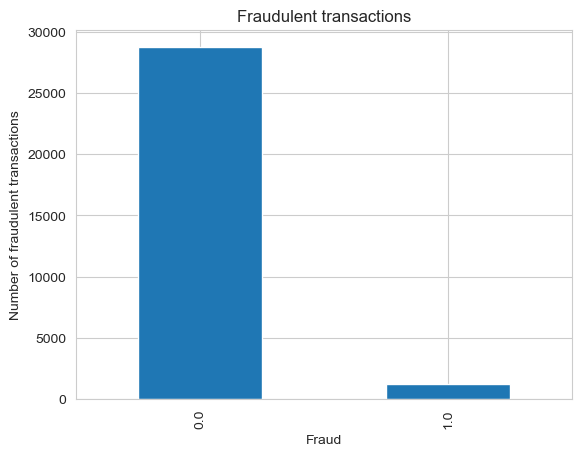

In [6]:
# evaluate target distribution
df['target'].value_counts().plot(kind = 'bar')
plt.title('Fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Fraud')
plt.show()

In [7]:
df['target'].value_counts(normalize=True)

0.0    0.9572
1.0    0.0428
Name: target, dtype: float64

**Observations**
* Data is highly imbalanced on target variable(very typical in fraud detection). 96% are not fraudulent operations and 4% are recognized as fraud operations. 

*****
#### Variable Types
Next, let's identify the categorical and numerical variables


In [8]:
# creating list of categorical variables
cat_vars = [var for var in df.columns if df[var].dtype == 'O']
# number of categorical variables
print(len(cat_vars))
# quick check on cat vars
df[cat_vars].head()

33


,test_ab_version,pm_card_bank,pm_card_country_code,pm_card_level,pm_card_type,postcode,region_cp,province_cp,locality_cp,ba_postcode,cust_phone_country,checkout_user_agent_browser_family,checkout_user_agent_browser_version,checkout_user_agent_device_family,checkout_user_agent_device_brand,checkout_user_agent_device_model,checkout_user_agent_os_family,checkout_user_agent_os_version,item_prices,device_screen,device_browser_version,device_browser_language,device_browser_type,real_ip_parent_organization,real_ip_city,real_ip_region,real_ip_isp,ip_userType,ip_address.traits.user_type,payment_method_card_type,bank_countrycode,creditcard_level,creditcard_type
0,B,NaN,NaN,NaN,NaN,21130,Andalucia,Huelva,Palos de la Frontera,21130,ES,Chrome,84.0.4147,other,NaN,NaN,windows,10,164.46,768X1366,84.0.4147.135,"ES-ES,ES;Q=0.9,EN;Q=0.8",CHROME,YA.COM INTERNET FACTORY,CASARICHE,SEVILLA,ORANGE ESPAGNE SA,wifi,cellular,NaN,NaN,NaN,NaN
1,B,"BANKIA, S.A.",ES,CLASSIC,DEBIT,28936,Madrid,Madrid,Móstoles,29004,ES,Chrome Mobile,85.0.4183,xiaomi redmi note 9s,XiaoMi,Redmi Note 9S,android,10,"16.49,8.47",833X375,85.0.4183.127,"ES-ES,ES;Q=0.9",CHROME,DIGI SPAIN RESIDENTIAL,LOS CARMENES,MADRID,DIGI SPAIN TELECOM S.L.U.,wifi,residential,visa,ES,CLASSIC,DEBIT
2,B,"CAIXABANK, S.A.",ES,ELECTRON,DEBIT,38780,Canarias,Santa Cruz de Tenerife,Tijarafe,38780,ES,Opera,71.0.3770,other,NaN,NaN,windows,10,454.46,1024X1280,71.0.3770.441,"ES-ES,ES;Q=0.9",OPR,YA.COM INTERNET FACTORY,LLANOS DE ARIDANE,SANTA CRUZ DE TENERIFE,ORANGE ESPAGNE SA,wired,residential,visa,ES,ELECTRON,DEBIT
3,B,NaN,NaN,NaN,NaN,16740,Castilla - La Mancha,Cuenca,"Almarcha, La",16740,ES,Chrome,86.0.4240,other,NaN,NaN,windows,10,147.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wifi,residential,NaN,NaN,NaN,NaN
4,B,"ABANCA CORPORACION BANCARIA, S.A.",ES,ELECTRON,DEBIT,32635,Galicia,Ourense,Xinzo de Limia,32430,ES,Chrome Mobile,85.0.4183,samsung sm-g975f,Samsung,SM-G975F,android,10,"98.15,99.17,12.36,16.51,16.51,95.04,640.51",869X412,85.0.4183.101,"ES-ES,ES;Q=0.9,EN;Q=0.8,GL;Q=0.7",CHROME,TELEFONICA DE ESPANA SAU,BASTIAGUEIRO,A CORUNA,TELEFONICA DE ESPANA,wifi,residential,visa,ES,ELECTRON,DEBIT


**Observations:**

the true type of item_prices is of numerical and should be transformed in feature engineering part to something more meaningful than comma separated item prices. For example we could calculate number of items purchased

In [9]:
# now let's identify the numerical variables
num_vars = [var for var in df.columns if df[var].dtype in ['float64','bool']]
# number of numerical variables
print(len(num_vars))
# check first rows for numerical columns
df[num_vars].head()

22


,order_amount,downpayment_amount,principal_amount,num_instalments_initial,pm_card_expiration_year,pm_card_expiration_monht,pm_bincode,pm_is_prepaid,pm_has_bank,pm_is_national,target,cust_phone_prefix,checkout_user_agent_is_pc,checkout_user_agent_is_mobile,checkout_user_agent_is_tablet,checkout_user_agent_is_touch_capable,total_price,device_cookies_enabled,providerZ_score,ip_reputation,log_providerA_score,providerY_score
0,208.00,9.904286,198.095714,20.0,NaN,NaN,NaN,False,True,False,0.0,34.0,1.0,0.0,0.0,0.0,198.9966,1.0,122.0,1.0,-2.302585,4.0
1,34.19,2.180000,32.010000,16.0,2022.0,12.0,485720.0,False,True,True,0.0,34.0,0.0,1.0,0.0,1.0,30.2016,0.0,65.0,1.0,-2.302585,2.0
2,500.77,22.480000,478.290000,24.0,2024.0,12.0,476664.0,False,True,True,0.0,34.0,1.0,0.0,0.0,0.0,486.2722,1.0,78.0,1.0,-1.347074,4.0
3,184.95,11.750000,173.200000,16.0,NaN,NaN,NaN,False,True,False,0.0,34.0,1.0,0.0,0.0,0.0,178.9953,NaN,64.0,1.0,-2.302585,4.0
4,1201.24,53.910000,1147.330000,24.0,2023.0,3.0,491767.0,False,True,True,0.0,34.0,0.0,1.0,0.0,1.0,1190.2770,1.0,500.0,1.0,2.600465,5.0


In [9]:
# now let's identify the temporal variables
temp_vars = [var for var in df.columns if df[var].dtype == '<M8[ns]']
# number of temporal variables
print(len(temp_vars))
# check first rows for temporal variables
df[temp_vars].head(5)

3


,created,scheduled_first_payment_date,customer_created
0,2020-09-04,2020-10-02,2021-02-06
1,2020-10-02,2020-11-05,2021-01-07
2,2020-12-11,2021-01-10,2020-12-11
3,2020-11-30,2020-12-28,2020-11-30
4,2020-09-18,2020-10-17,2020-09-18


**Observations**
* Some customers were added to the database after their initial purchases.

*****
### Missing values

Let's go ahead and find out which variables of the dataset contain missing values.

In [10]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isna().sum() > 0]
# determine percentage of missing values (expressed as decimals) and display the result ordered by % of missin data
df[vars_with_na].isnull().mean().sort_values(ascending=False).head(10)

checkout_user_agent_device_brand    0.449800
checkout_user_agent_device_model    0.449800
creditcard_level                    0.212700
creditcard_type                     0.161567
bank_countrycode                    0.161567
payment_method_card_type            0.161567
pm_card_bank                        0.138867
pm_card_level                       0.127200
pm_bincode                          0.124767
pm_card_country_code                0.124767
dtype: float64

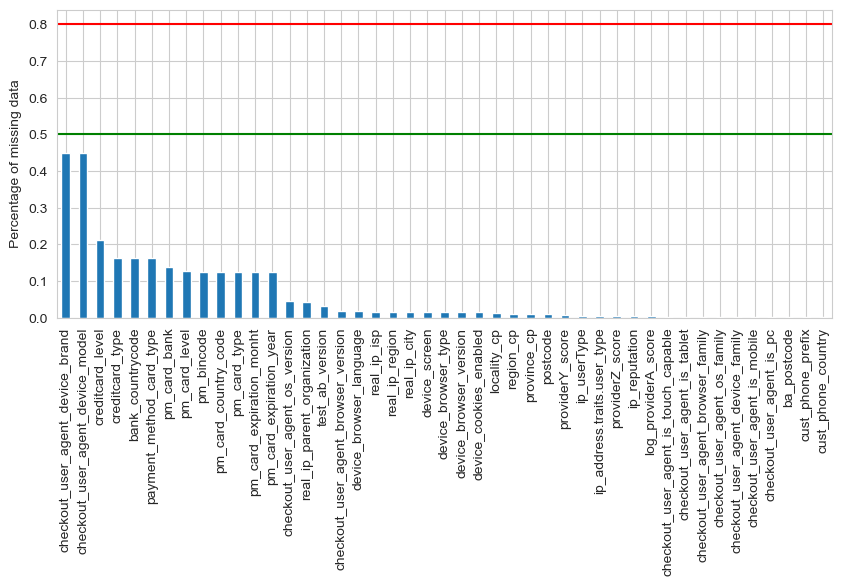

In [11]:
# plot missing information ratio
df[vars_with_na].isna().mean().sort_values(ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.8, color='r', linestyle='-')
plt.axhline(y=0.5, color='g', linestyle='-')
plt.show()

**Observations**
There are not that many columns with large ratio of missing information. Top two are:
* checkout_user_agent_device_brand (0.449800)
* checkout_user_agent_device_model (0.449800)

We will try to use them anyway and see if they hold predictive power.

In [12]:
# now we can determine which variables, from those with missing data,
# are numerical and which are categorical
cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]
print('Number of categorical variables with na: ', len(cat_na))
print('Number of numerical variables with na: ', len(num_na))

Number of categorical variables with na:  32
Number of numerical variables with na:  13


*****
### Numerical variables
Let's go ahead and find out what numerical variables we have in the dataset

In [13]:
print('Number of numerical variables: ', len(num_vars))
# visualise the numerical variables
df[num_vars].head()

Number of numerical variables:  22


,order_amount,downpayment_amount,principal_amount,num_instalments_initial,pm_card_expiration_year,pm_card_expiration_monht,pm_bincode,pm_is_prepaid,pm_has_bank,pm_is_national,target,cust_phone_prefix,checkout_user_agent_is_pc,checkout_user_agent_is_mobile,checkout_user_agent_is_tablet,checkout_user_agent_is_touch_capable,total_price,device_cookies_enabled,providerZ_score,ip_reputation,log_providerA_score,providerY_score
0,208.00,9.904286,198.095714,20.0,NaN,NaN,NaN,False,True,False,0.0,34.0,1.0,0.0,0.0,0.0,198.9966,1.0,122.0,1.0,-2.302585,4.0
1,34.19,2.180000,32.010000,16.0,2022.0,12.0,485720.0,False,True,True,0.0,34.0,0.0,1.0,0.0,1.0,30.2016,0.0,65.0,1.0,-2.302585,2.0
2,500.77,22.480000,478.290000,24.0,2024.0,12.0,476664.0,False,True,True,0.0,34.0,1.0,0.0,0.0,0.0,486.2722,1.0,78.0,1.0,-1.347074,4.0
3,184.95,11.750000,173.200000,16.0,NaN,NaN,NaN,False,True,False,0.0,34.0,1.0,0.0,0.0,0.0,178.9953,NaN,64.0,1.0,-2.302585,4.0
4,1201.24,53.910000,1147.330000,24.0,2023.0,3.0,491767.0,False,True,True,0.0,34.0,0.0,1.0,0.0,1.0,1190.2770,1.0,500.0,1.0,2.600465,5.0



Discrete variables

Let's go ahead and find which variables are discrete, i.e., show a finite number of values


In [14]:
#  let's male a list of discrete variables
discrete_vars = [var for var in num_vars if len(
    df[var].unique()) <= 31]
print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  15


In [15]:
# let's visualise the discrete variables
df[discrete_vars].head()

,num_instalments_initial,pm_card_expiration_year,pm_card_expiration_monht,pm_is_prepaid,pm_has_bank,pm_is_national,target,cust_phone_prefix,checkout_user_agent_is_pc,checkout_user_agent_is_mobile,checkout_user_agent_is_tablet,checkout_user_agent_is_touch_capable,device_cookies_enabled,ip_reputation,providerY_score
0,20.0,NaN,NaN,False,True,False,0.0,34.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0
1,16.0,2022.0,12.0,False,True,True,0.0,34.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0
2,24.0,2024.0,12.0,False,True,True,0.0,34.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0
3,16.0,NaN,NaN,False,True,False,0.0,34.0,1.0,0.0,0.0,0.0,NaN,1.0,4.0
4,24.0,2023.0,3.0,False,True,True,0.0,34.0,0.0,1.0,0.0,1.0,1.0,1.0,5.0


**Observations**

pm_card_expiration_year and month are technically a categorical/temporal variables but we can treat them as numerical for now. We will transofrm them in fe part to have some meaningful information like, was customer's card expired when ordering something, etc. 

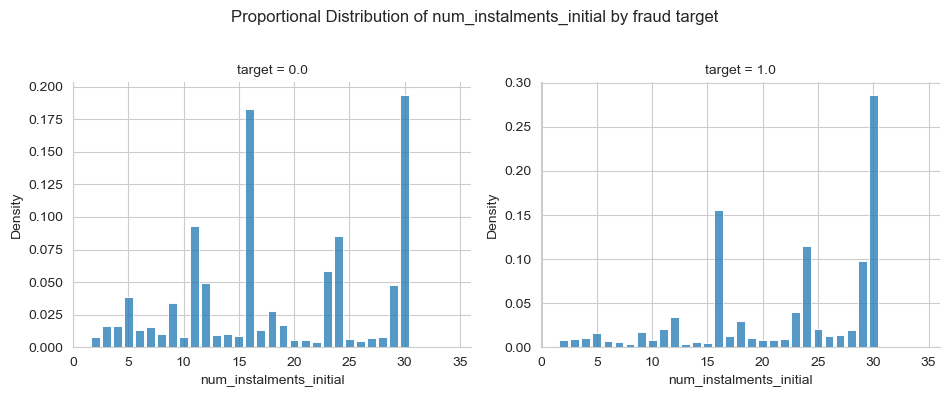

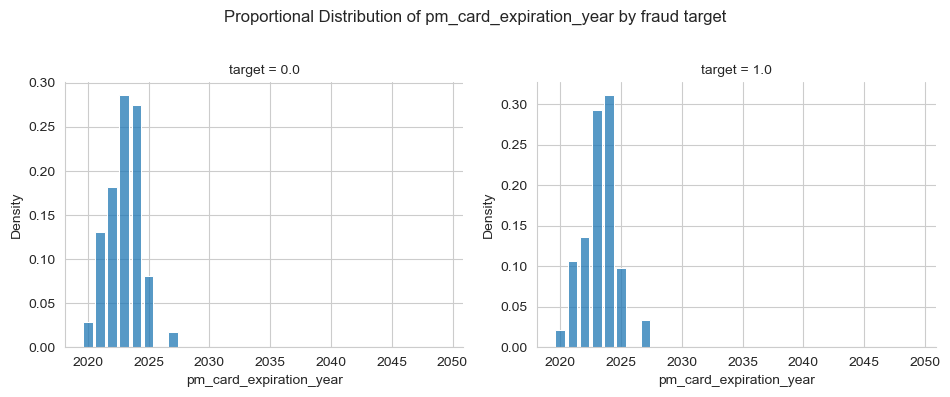

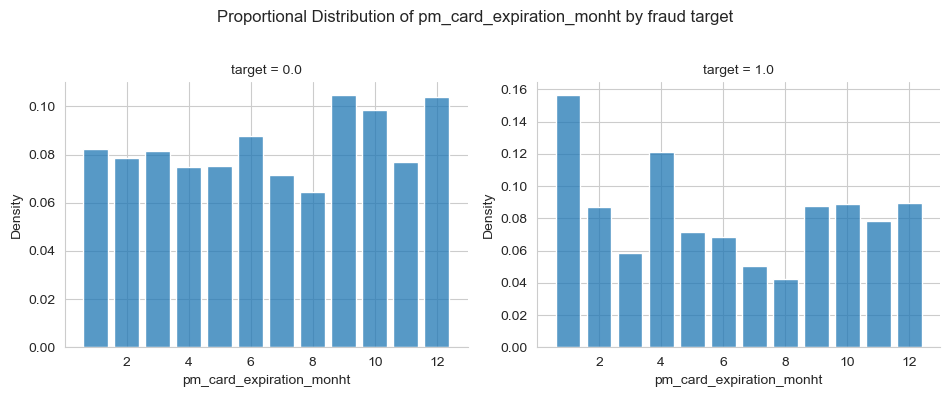

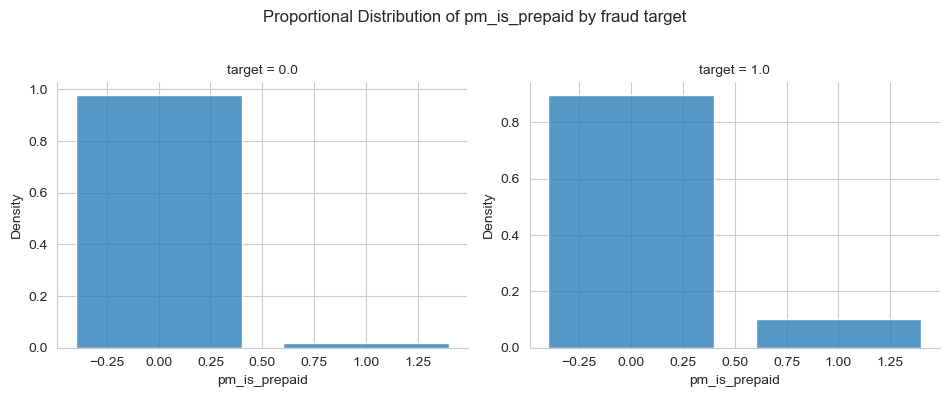

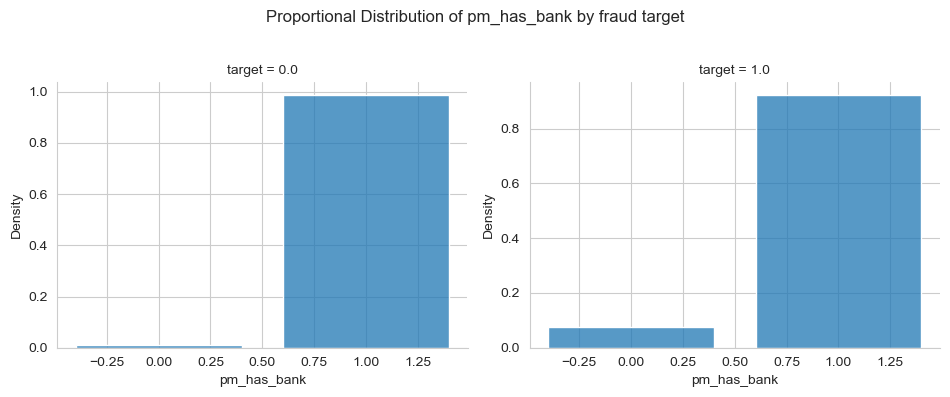

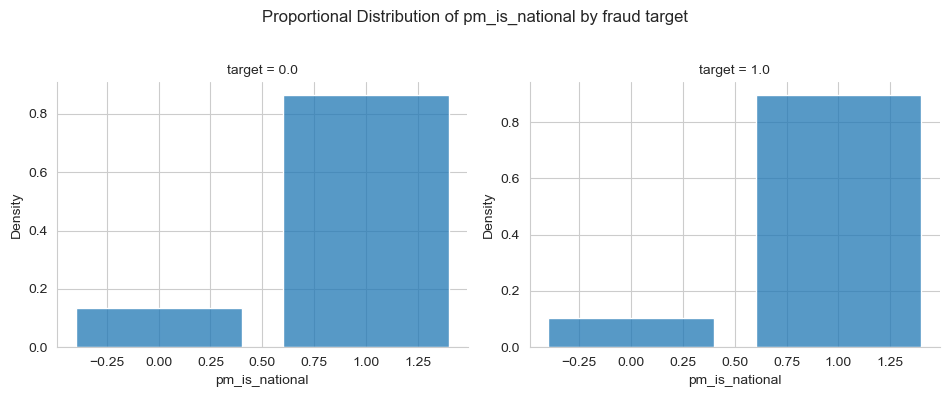

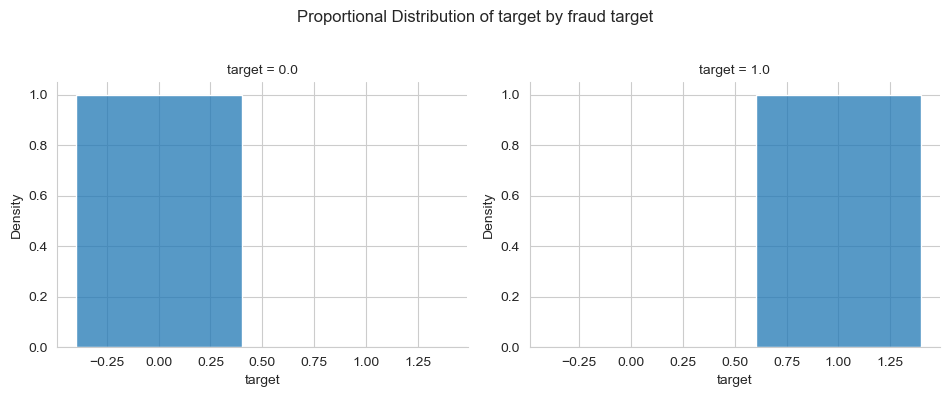

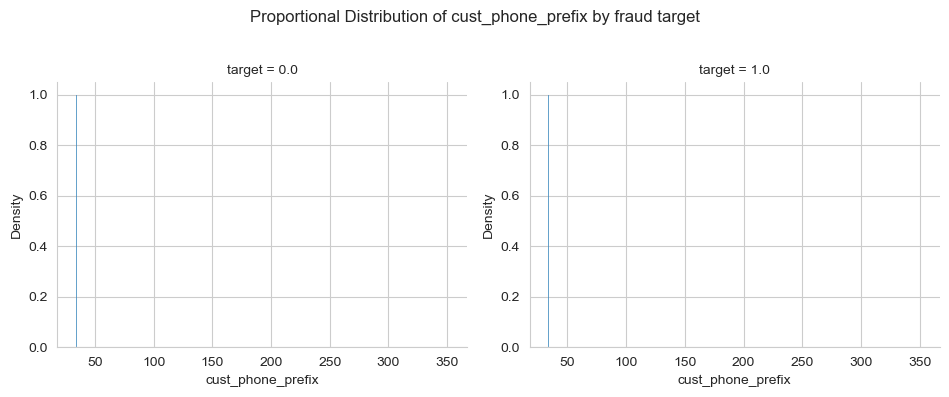

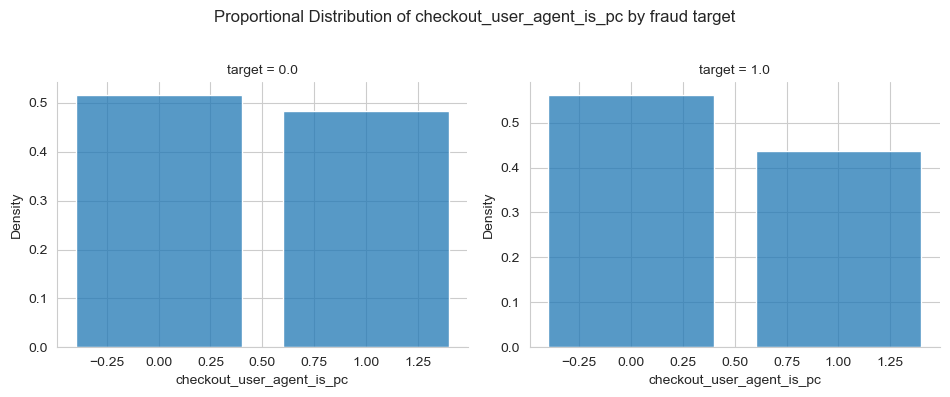

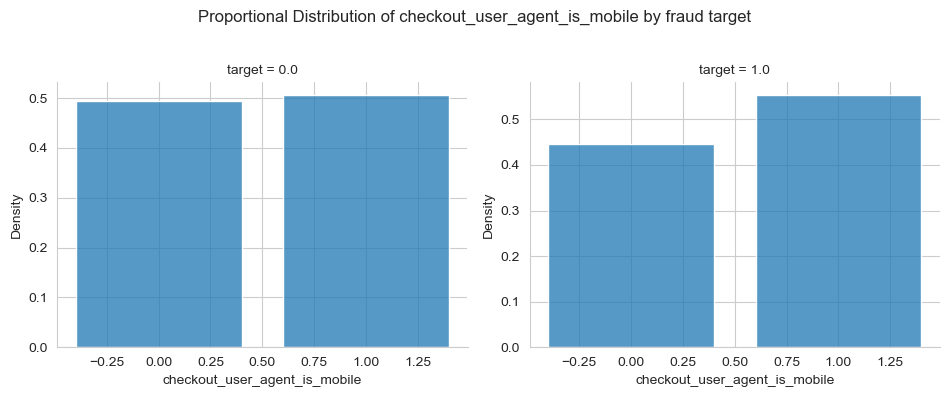

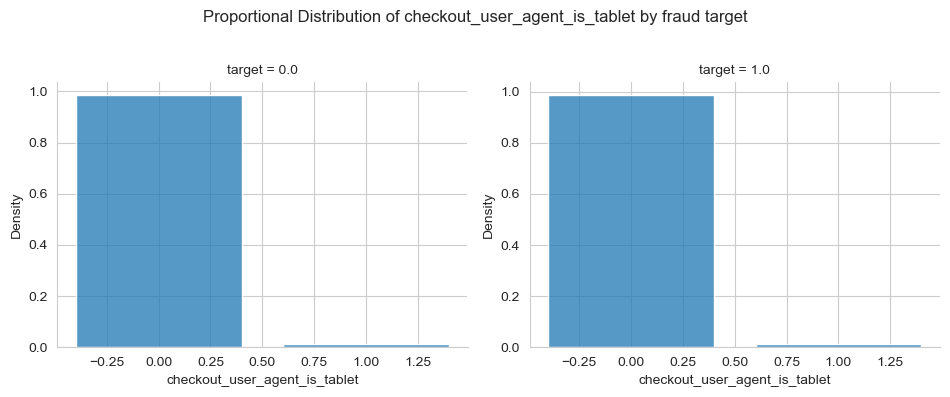

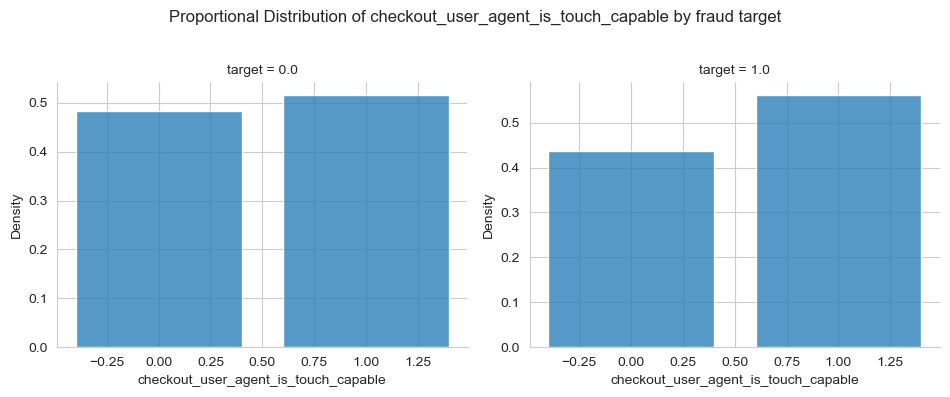

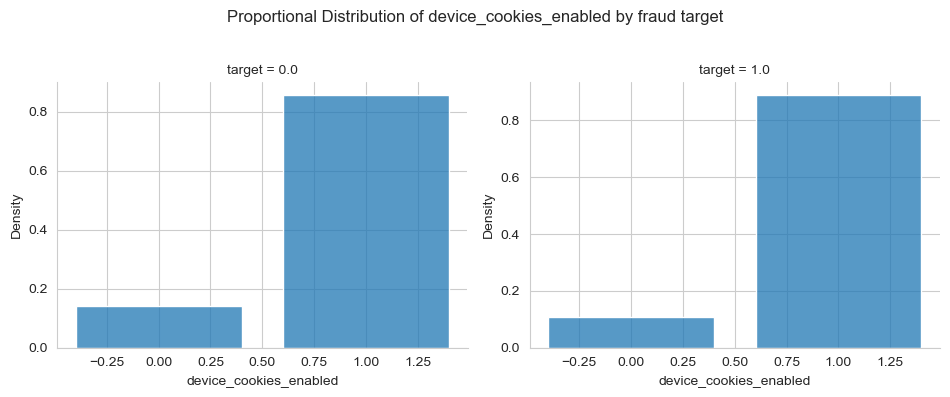

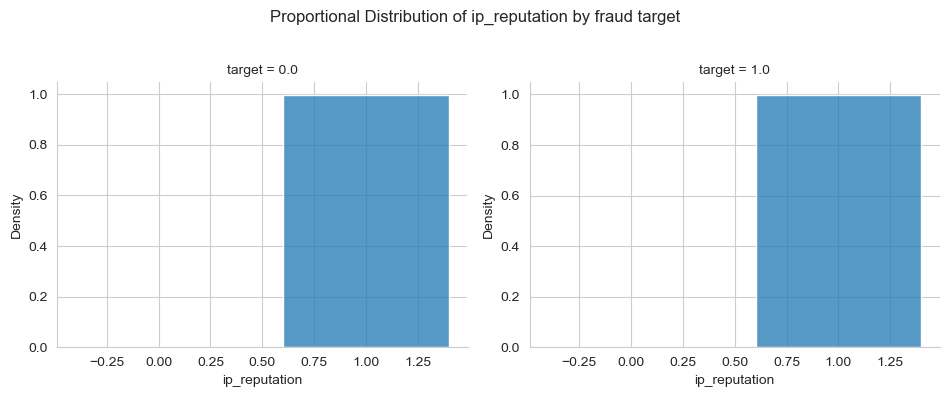

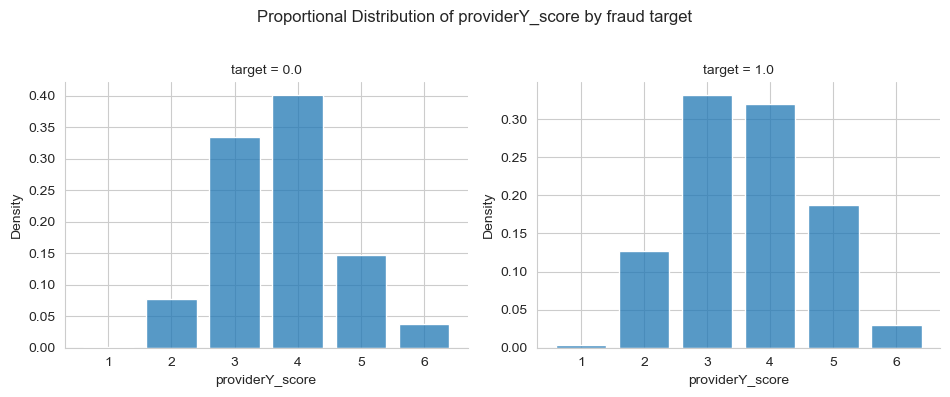

In [16]:
for var in discrete_vars:
    # Normalize counts to show proportion
    g = sns.FacetGrid(df, col='target', height=4, aspect=1.2, sharey=False)
    g.map(sns.histplot, var, stat="density", discrete=True, shrink=0.8)

    plt.subplots_adjust(top=0.8)
    g.fig.suptitle(f'Proportional Distribution of {var} by fraud target')
    plt.show()

*****
### Continuous variables
Let's go ahead and find the distribution of the continuous variables. We will consider continuous variables to all those that are not discrete.


In [17]:
# make list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars]
print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  7


In [18]:
# let's visualise the continuous variables
df[cont_vars].head()

,order_amount,downpayment_amount,principal_amount,pm_bincode,total_price,providerZ_score,log_providerA_score
0,208.00,9.904286,198.095714,NaN,198.9966,122.0,-2.302585
1,34.19,2.180000,32.010000,485720.0,30.2016,65.0,-2.302585
2,500.77,22.480000,478.290000,476664.0,486.2722,78.0,-1.347074
3,184.95,11.750000,173.200000,NaN,178.9953,64.0,-2.302585
4,1201.24,53.910000,1147.330000,491767.0,1190.2770,500.0,2.600465


order_amount by target var


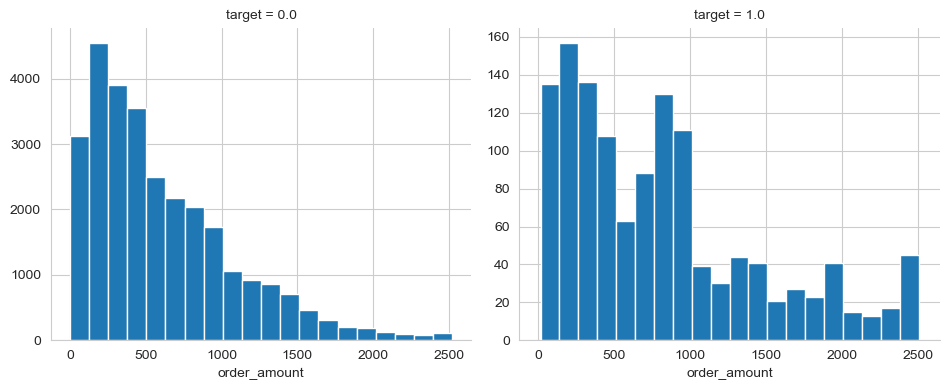

downpayment_amount by target var


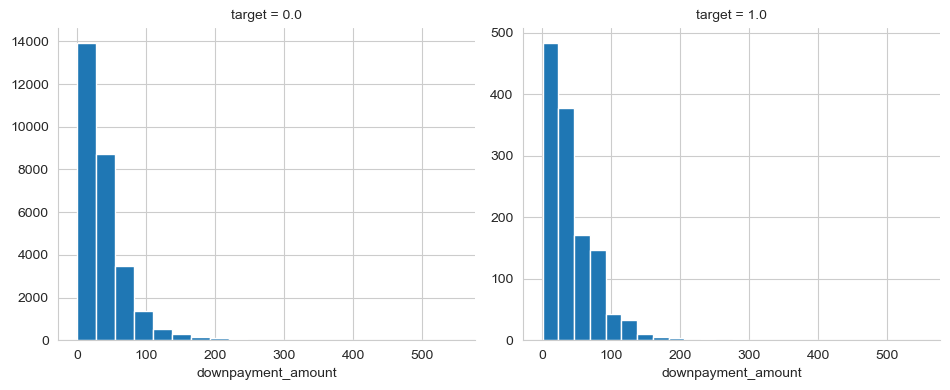

principal_amount by target var


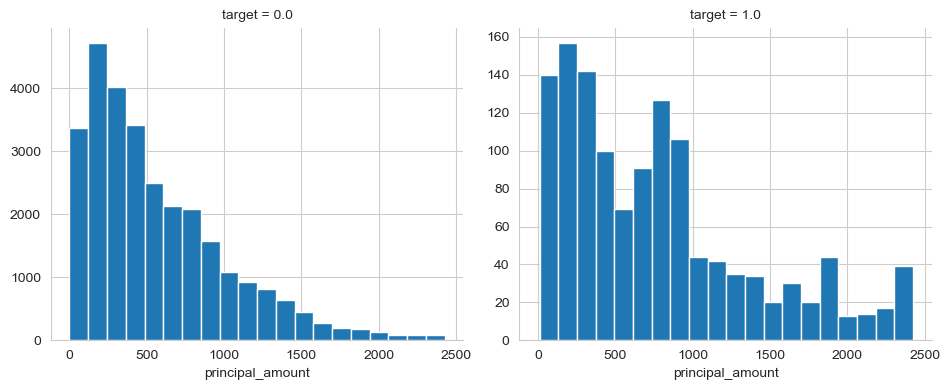

pm_bincode by target var


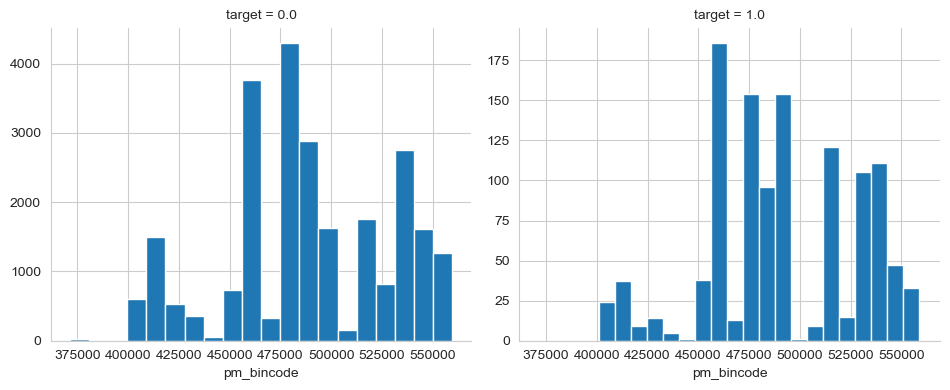

total_price by target var


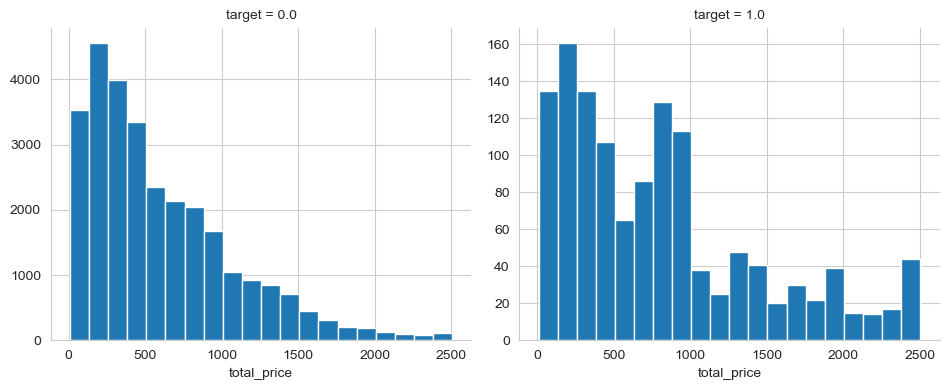

providerZ_score by target var


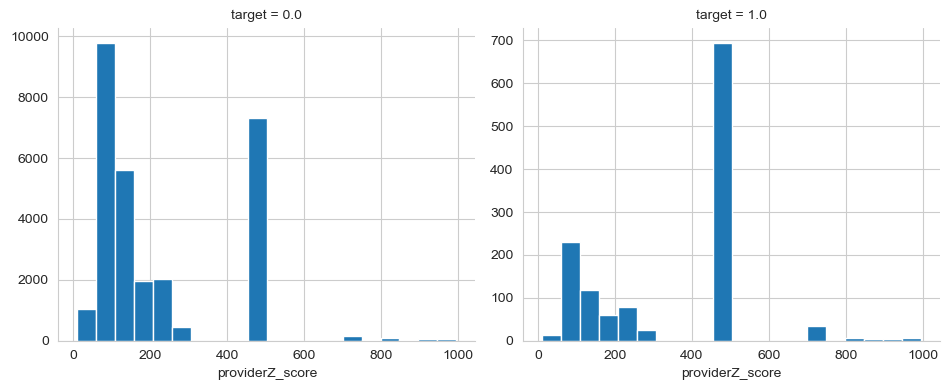

log_providerA_score by target var


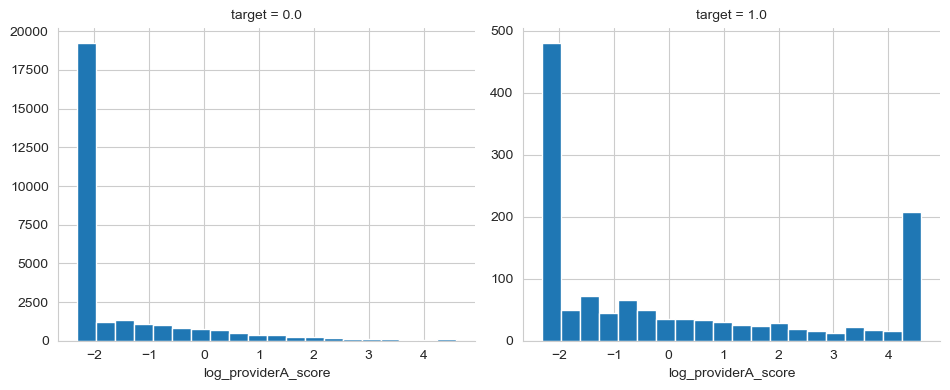

In [19]:
# loop through continuous variables and group them by target
for var in cont_vars:
    print(f'{var} by target var')
    grid = sns.FacetGrid(df,col = 'target', height=4, aspect=1.2,sharey=False)
    grid.map(plt.hist,var, bins = 20)
    plt.show()

**Observations**
* The variables are not normally distributed. And there are a particular few that are extremely skewed like order_amount, downpayment_amount, principal_amount and total_price.
* We can apply a Yeo-Johnson transformation to variables like order_amount, downpayment_amount, principal_amount and total_price.
* It seems like log_providerA_score column differs between fraudulent and not fraudulent transactions. Fraud operations have overall a lerger score than non-fraudulent. 

#### Correlation

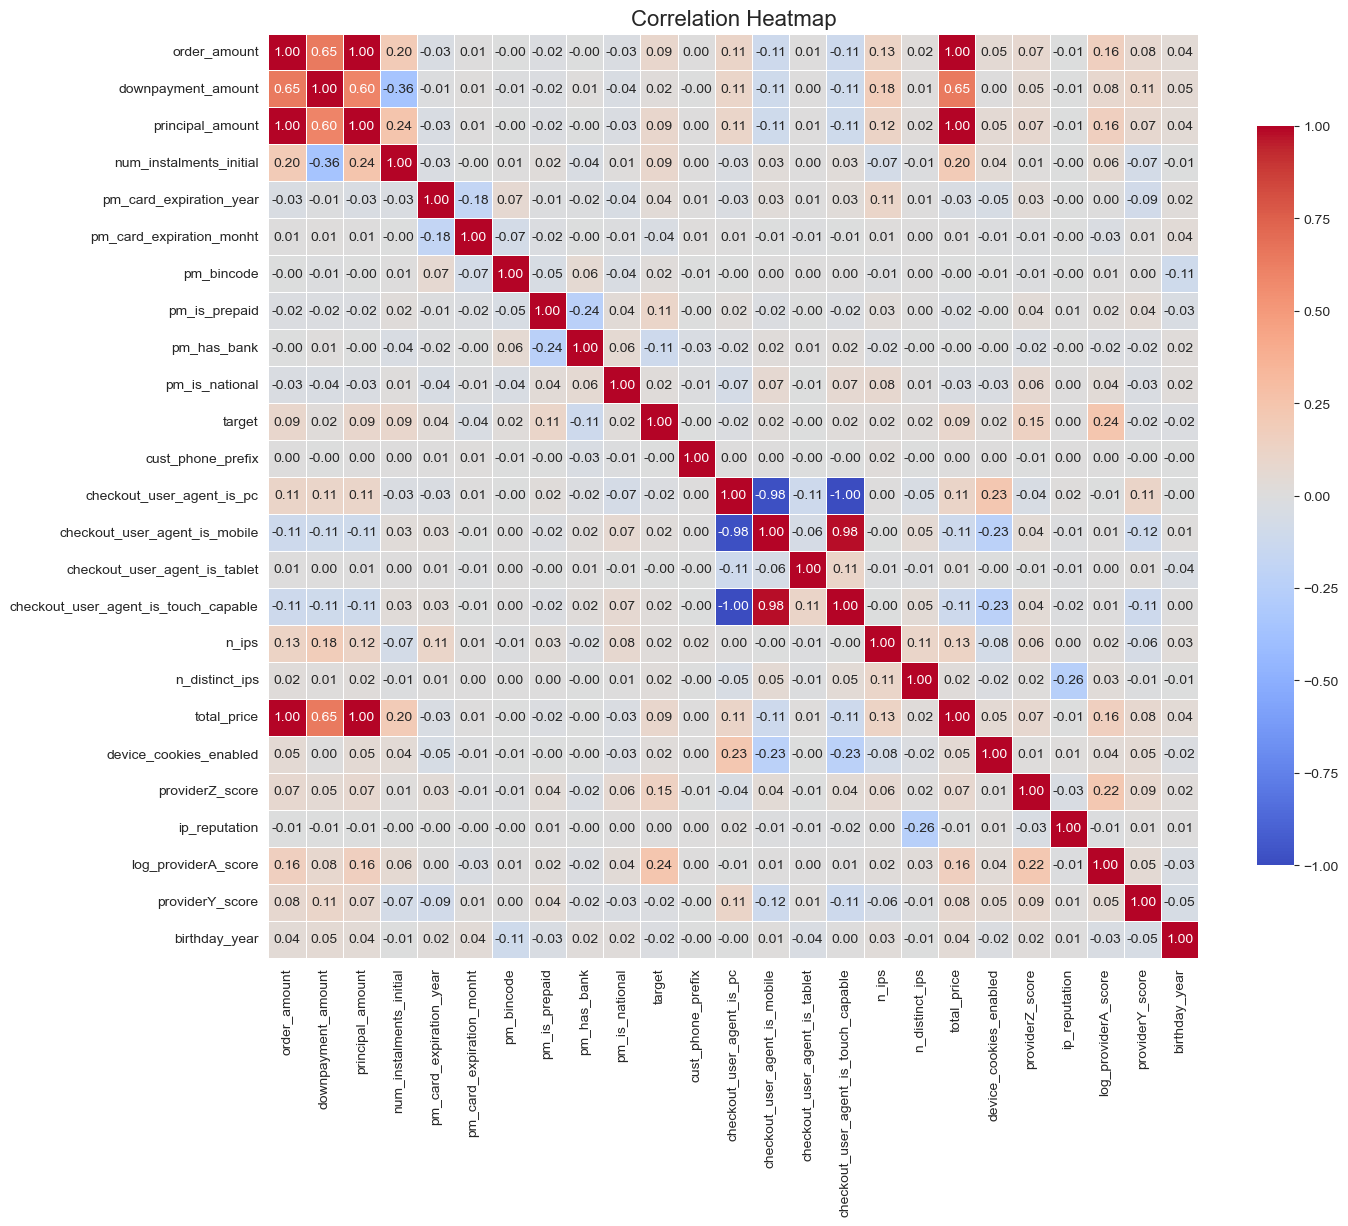

In [20]:
plt.figure(figsize=(15, 12))
# create the heatmap
sns.heatmap(df.corr(),
            annot=True,          
            fmt=".2f",           
            cmap="coolwarm",      
            vmin=-1, vmax=1,      
            linewidths=0.5,
            cbar_kws={"shrink": 0.8}
           )
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

**Observations**
* As expected, purchase price and overall amounts are positively correlated.
* Negatively correlated variables are of bool nature where we track user transaction purchase device.

*****
### Categorical variables
Let's go ahead and analyse the categorical variables present in the dataset.


In [21]:
print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  33


In [22]:
# let's visualise the values of the categorical variables
df[cat_vars].head()

,test_ab_version,pm_card_bank,pm_card_country_code,pm_card_level,pm_card_type,postcode,region_cp,province_cp,locality_cp,ba_postcode,cust_phone_country,checkout_user_agent_browser_family,checkout_user_agent_browser_version,checkout_user_agent_device_family,checkout_user_agent_device_brand,checkout_user_agent_device_model,checkout_user_agent_os_family,checkout_user_agent_os_version,item_prices,device_screen,device_browser_version,device_browser_language,device_browser_type,real_ip_parent_organization,real_ip_city,real_ip_region,real_ip_isp,ip_userType,ip_address.traits.user_type,payment_method_card_type,bank_countrycode,creditcard_level,creditcard_type
0,B,NaN,NaN,NaN,NaN,21130,Andalucia,Huelva,Palos de la Frontera,21130,ES,Chrome,84.0.4147,other,NaN,NaN,windows,10,164.46,768X1366,84.0.4147.135,"ES-ES,ES;Q=0.9,EN;Q=0.8",CHROME,YA.COM INTERNET FACTORY,CASARICHE,SEVILLA,ORANGE ESPAGNE SA,wifi,cellular,NaN,NaN,NaN,NaN
1,B,"BANKIA, S.A.",ES,CLASSIC,DEBIT,28936,Madrid,Madrid,Móstoles,29004,ES,Chrome Mobile,85.0.4183,xiaomi redmi note 9s,XiaoMi,Redmi Note 9S,android,10,"16.49,8.47",833X375,85.0.4183.127,"ES-ES,ES;Q=0.9",CHROME,DIGI SPAIN RESIDENTIAL,LOS CARMENES,MADRID,DIGI SPAIN TELECOM S.L.U.,wifi,residential,visa,ES,CLASSIC,DEBIT
2,B,"CAIXABANK, S.A.",ES,ELECTRON,DEBIT,38780,Canarias,Santa Cruz de Tenerife,Tijarafe,38780,ES,Opera,71.0.3770,other,NaN,NaN,windows,10,454.46,1024X1280,71.0.3770.441,"ES-ES,ES;Q=0.9",OPR,YA.COM INTERNET FACTORY,LLANOS DE ARIDANE,SANTA CRUZ DE TENERIFE,ORANGE ESPAGNE SA,wired,residential,visa,ES,ELECTRON,DEBIT
3,B,NaN,NaN,NaN,NaN,16740,Castilla - La Mancha,Cuenca,"Almarcha, La",16740,ES,Chrome,86.0.4240,other,NaN,NaN,windows,10,147.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wifi,residential,NaN,NaN,NaN,NaN
4,B,"ABANCA CORPORACION BANCARIA, S.A.",ES,ELECTRON,DEBIT,32635,Galicia,Ourense,Xinzo de Limia,32430,ES,Chrome Mobile,85.0.4183,samsung sm-g975f,Samsung,SM-G975F,android,10,"98.15,99.17,12.36,16.51,16.51,95.04,640.51",869X412,85.0.4183.101,"ES-ES,ES;Q=0.9,EN;Q=0.8,GL;Q=0.7",CHROME,TELEFONICA DE ESPANA SAU,BASTIAGUEIRO,A CORUNA,TELEFONICA DE ESPANA,wifi,residential,visa,ES,ELECTRON,DEBIT


### Number of labels: cardinality
Let's evaluate how many different categories are present in each of the variables.


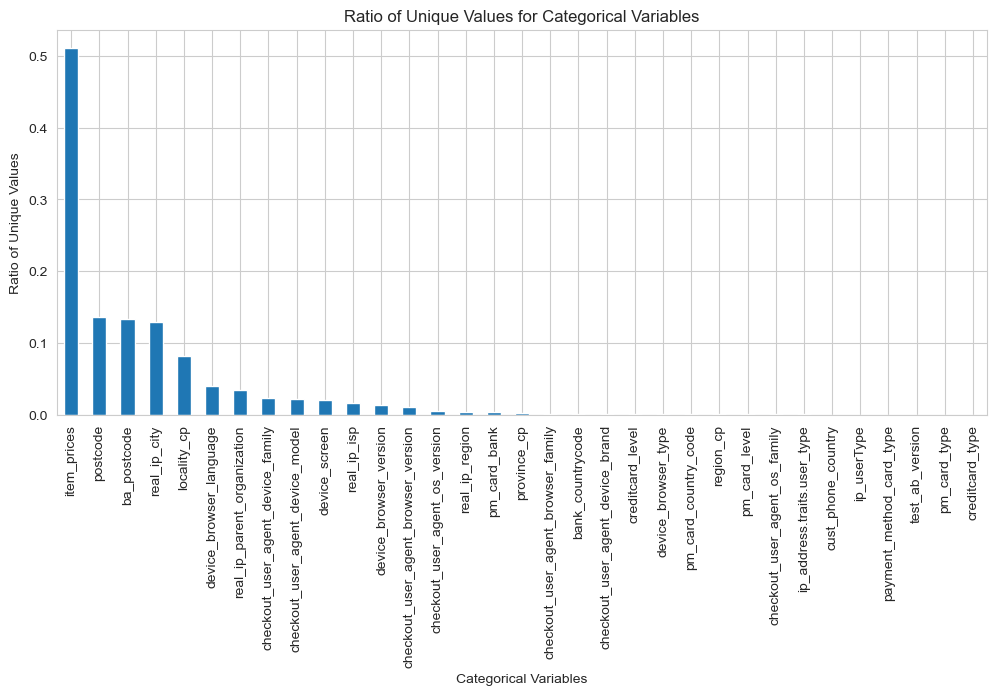

In [23]:
# check for cardinality in cat vars
unique_ratio = df[cat_vars].nunique() / len(df)
# sort the ratios in descending order and plot as a bar chart
unique_ratio.sort_values(ascending=False).plot.bar(figsize=(12, 5))
plt.title('Ratio of Unique Values for Categorical Variables')
plt.ylabel('Ratio of Unique Values')
plt.xlabel('Categorical Variables')
# Show the plot
plt.show()

In [142]:
df[cat_vars].nunique().sort_values(ascending=False).tail(20)

checkout_user_agent_os_version        137
real_ip_region                        113
pm_card_bank                           97
province_cp                            52
checkout_user_agent_browser_family     31
bank_countrycode                       25
checkout_user_agent_device_brand       20
creditcard_level                       20
device_browser_type                    20
pm_card_country_code                   20
region_cp                              19
pm_card_level                          16
checkout_user_agent_os_family          14
ip_address.traits.user_type             9
cust_phone_country                      4
ip_userType                             4
payment_method_card_type                3
test_ab_version                         2
pm_card_type                            2
creditcard_type                         2
dtype: int64

Number of categories for test_ab_version is: 2


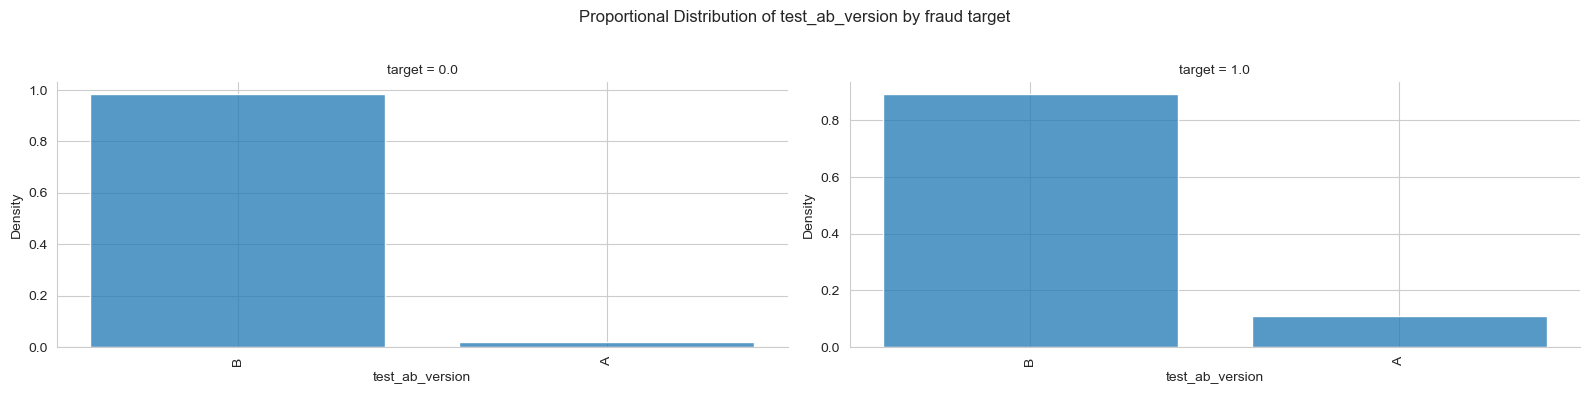

Number of categories for pm_card_bank is: 97


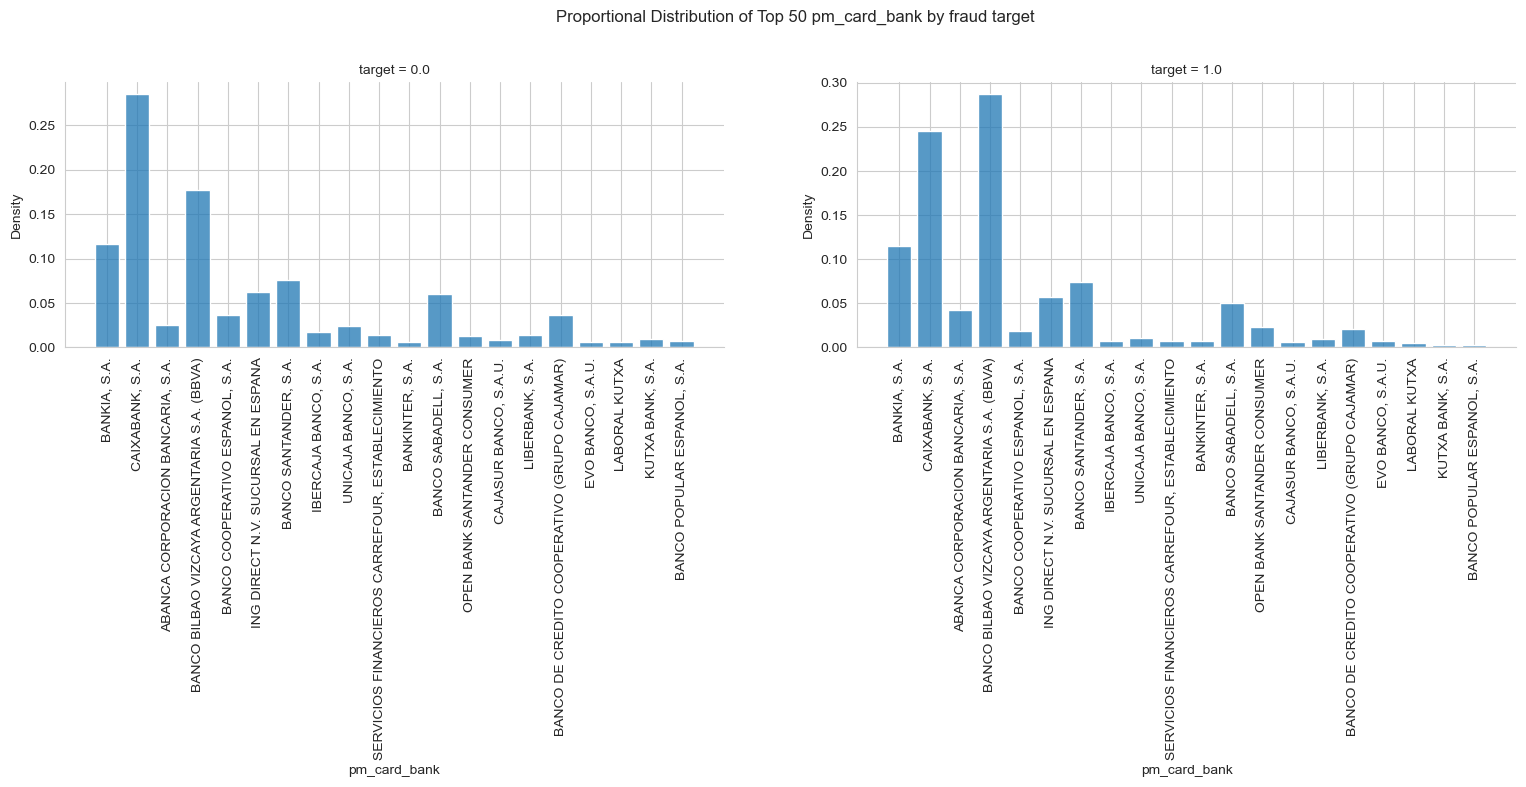

Number of categories for pm_card_country_code is: 20


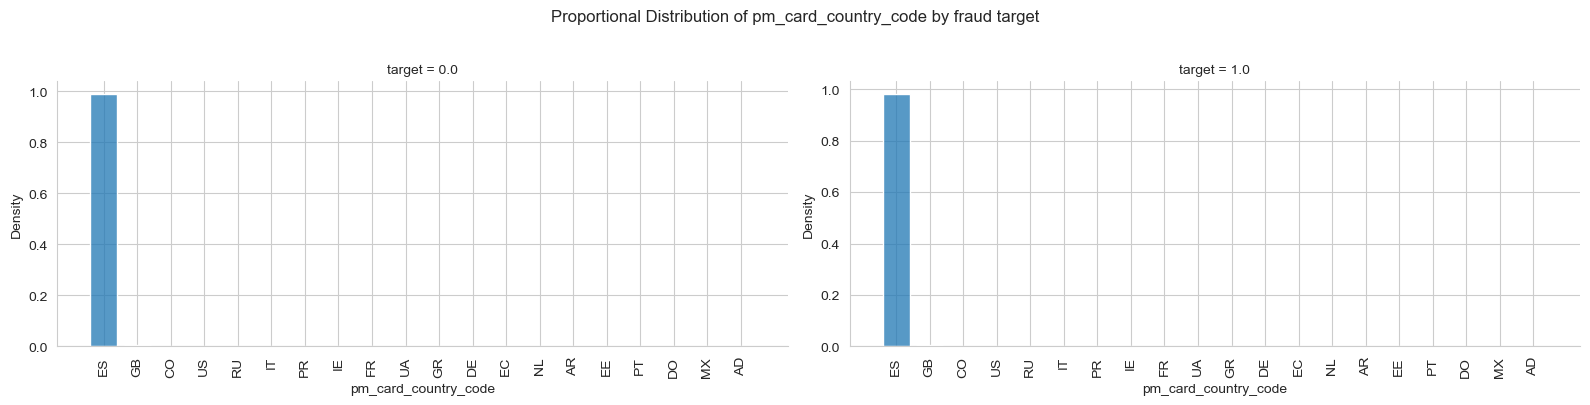

Number of categories for pm_card_level is: 16


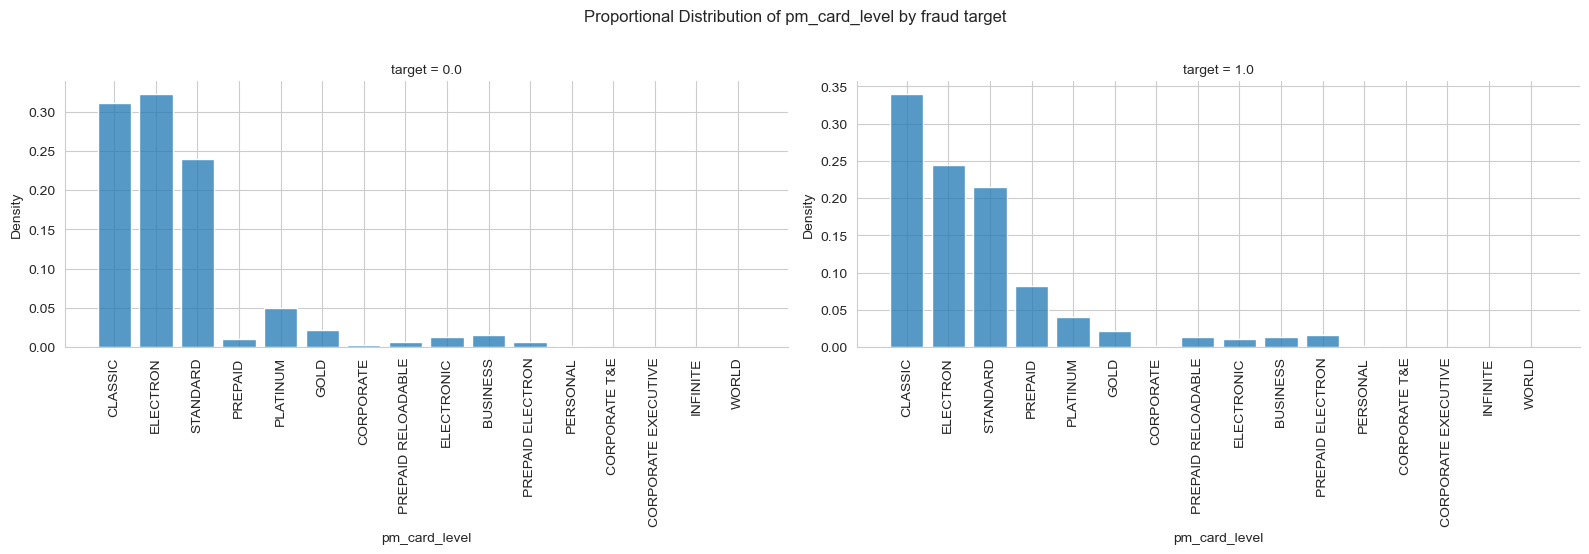

Number of categories for pm_card_type is: 2


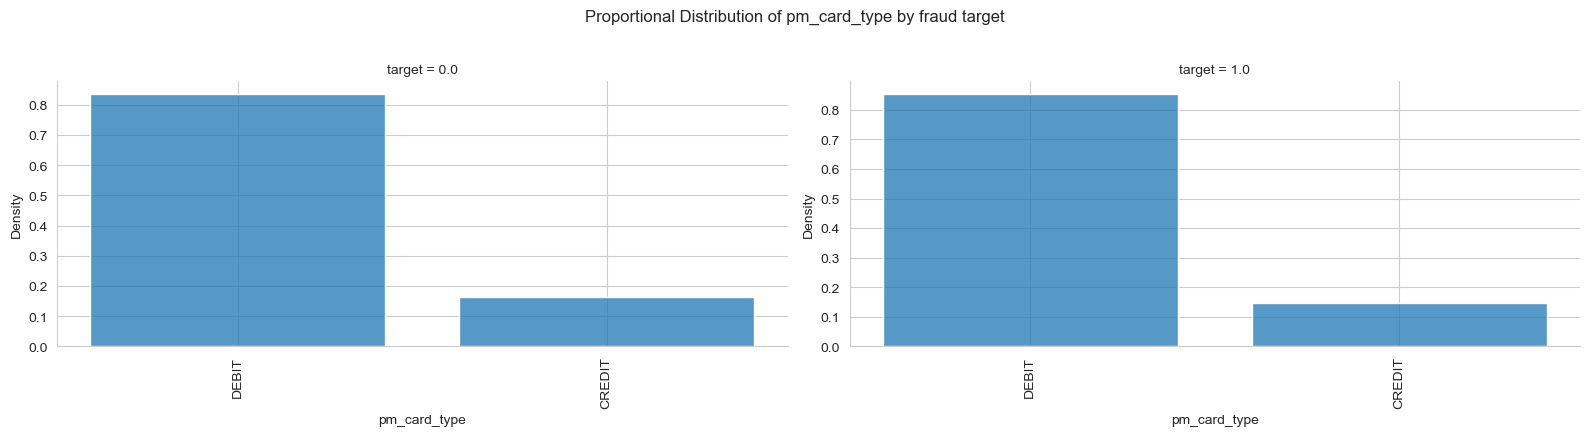

Number of categories for postcode is: 4093


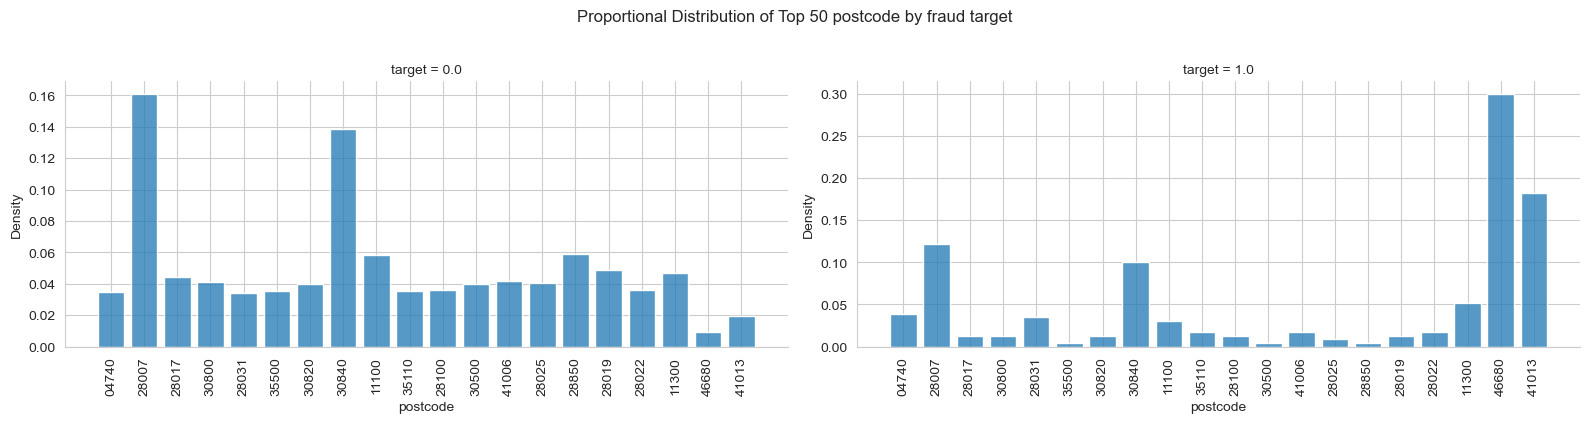

Number of categories for region_cp is: 19


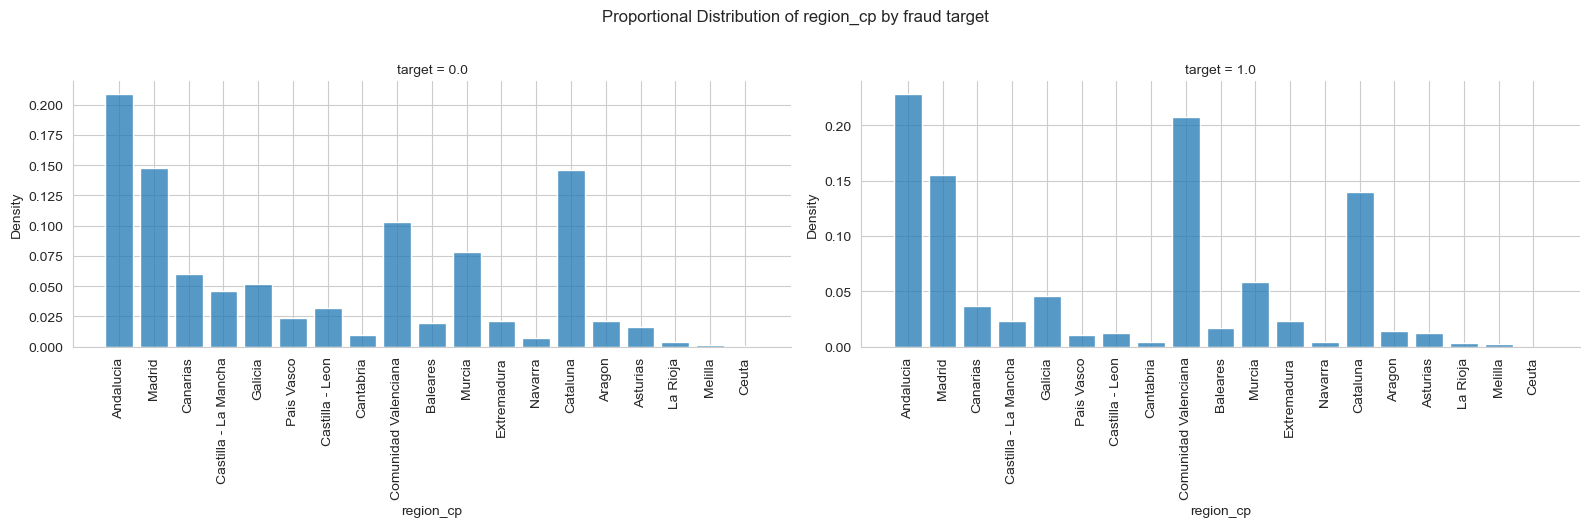

Number of categories for province_cp is: 52


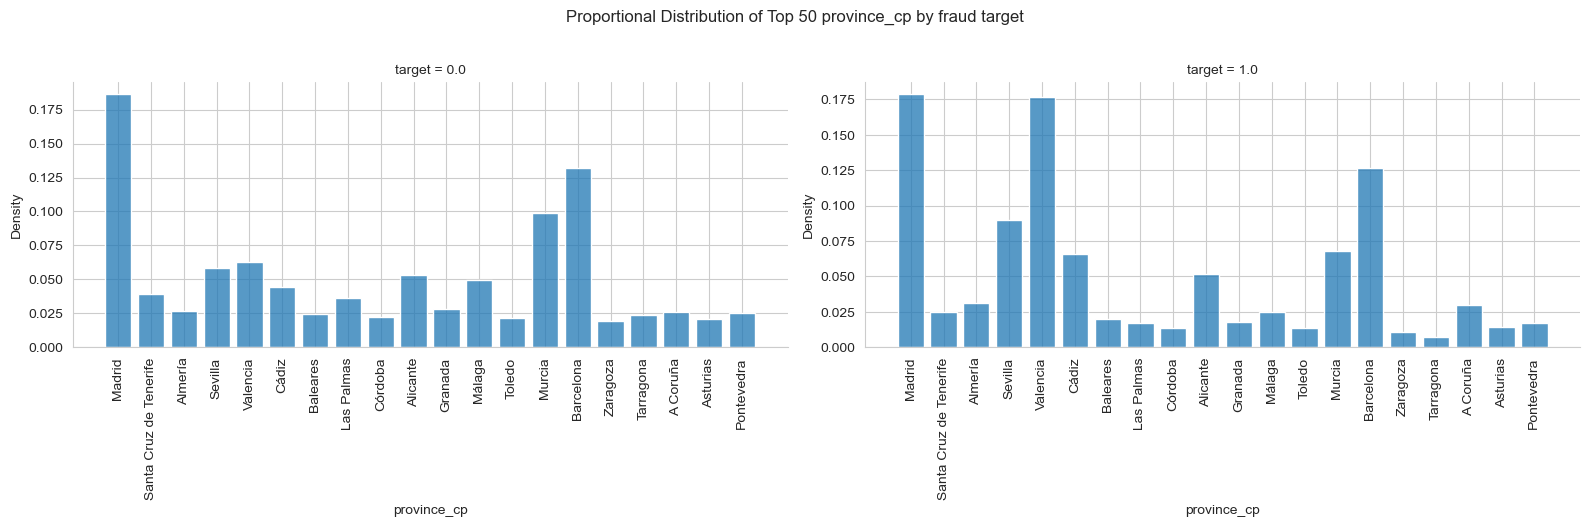

Number of categories for locality_cp is: 2440


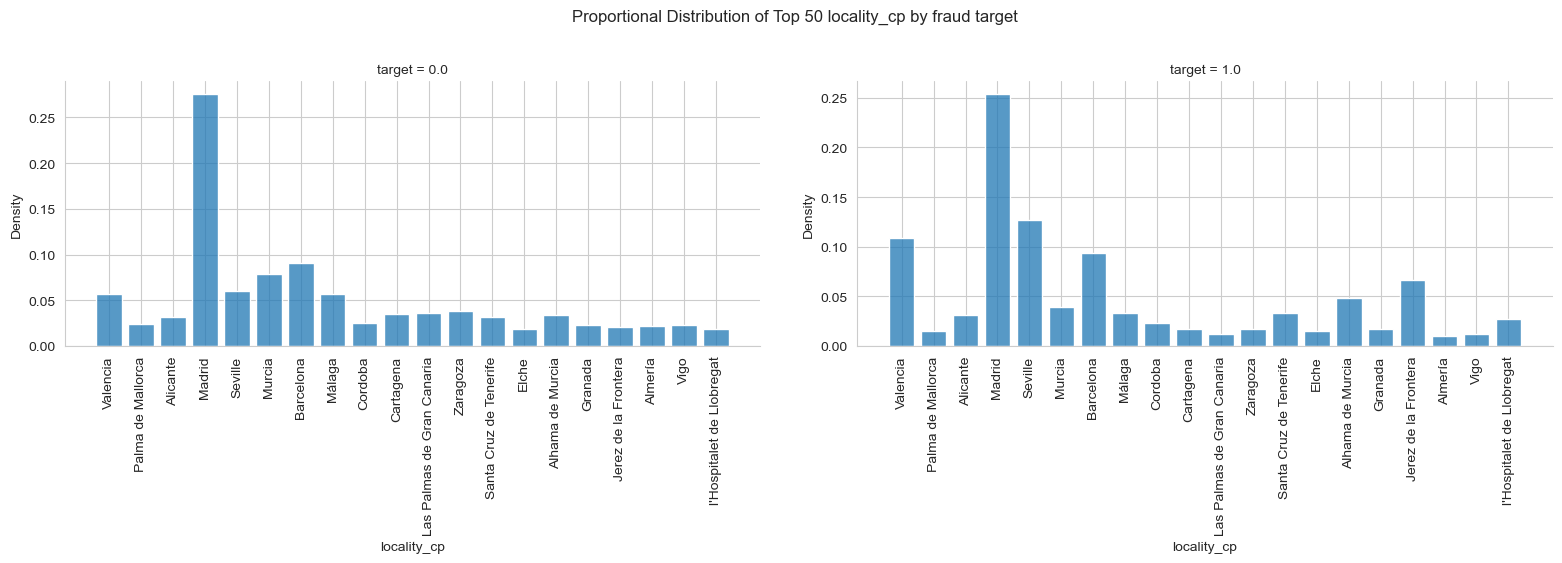

Number of categories for ba_postcode is: 3999


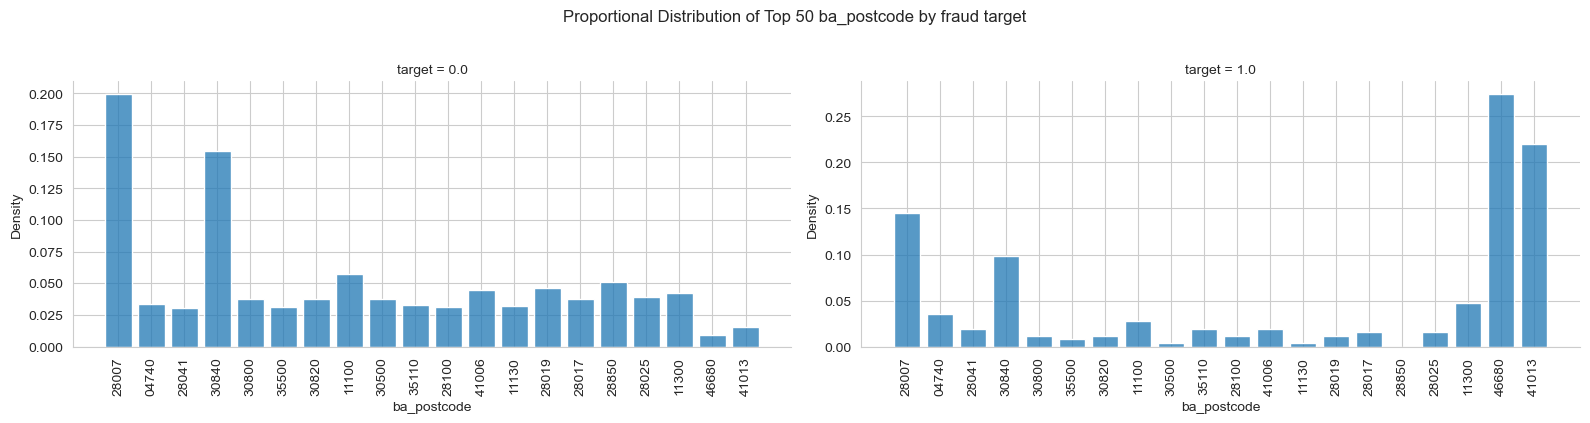

Number of categories for cust_phone_country is: 4


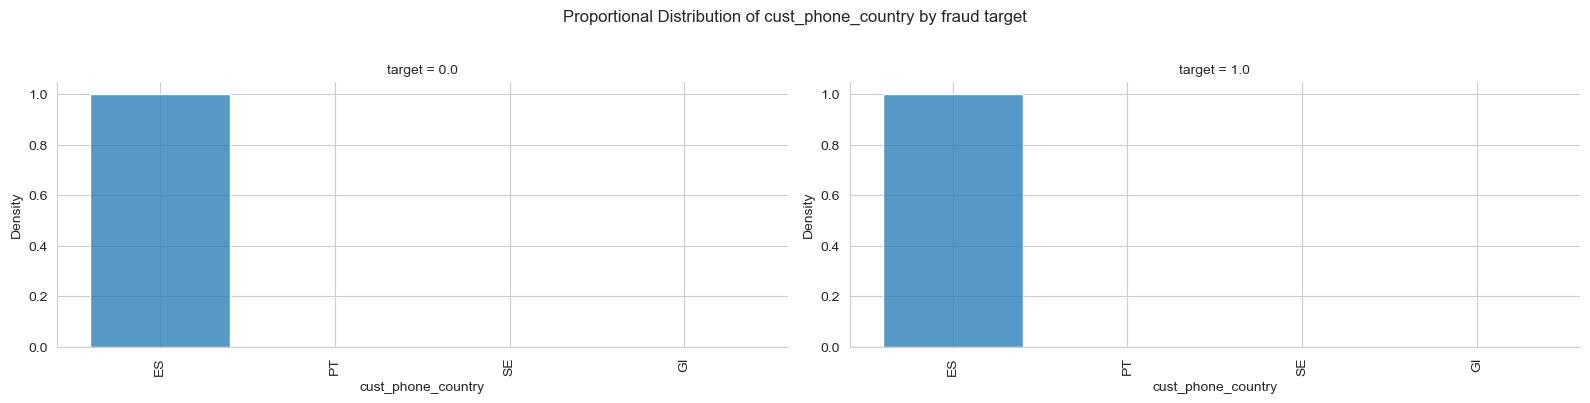

Number of categories for checkout_user_agent_browser_family is: 31


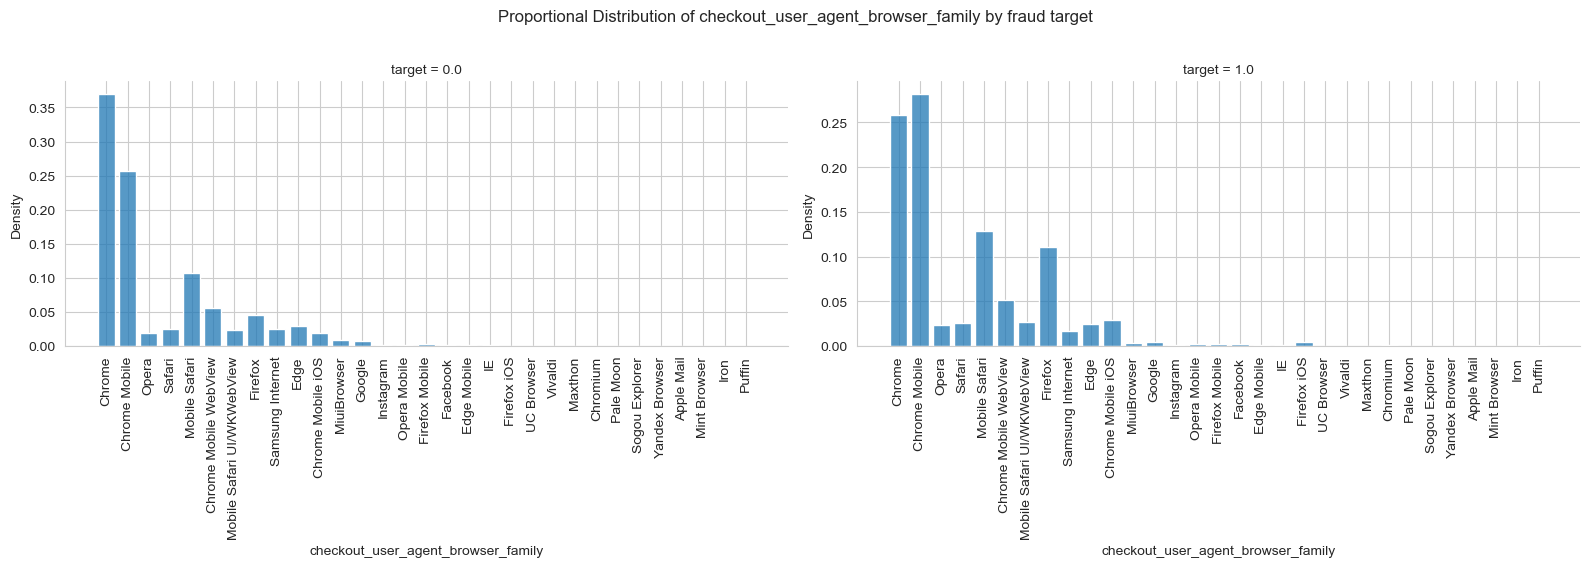

Number of categories for checkout_user_agent_browser_version is: 325


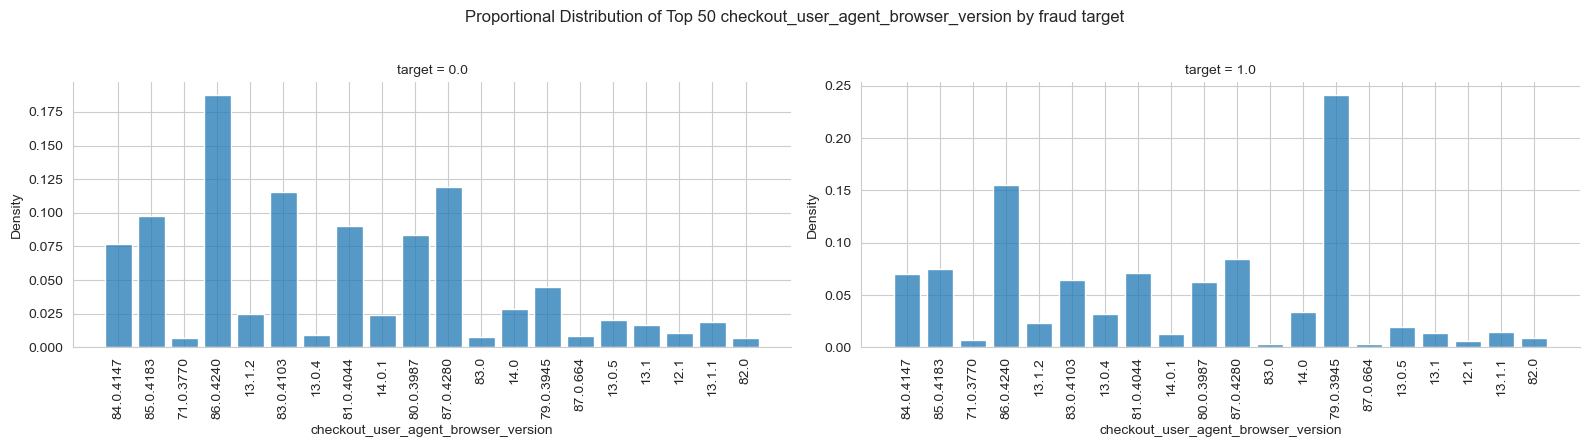

Number of categories for checkout_user_agent_device_family is: 711


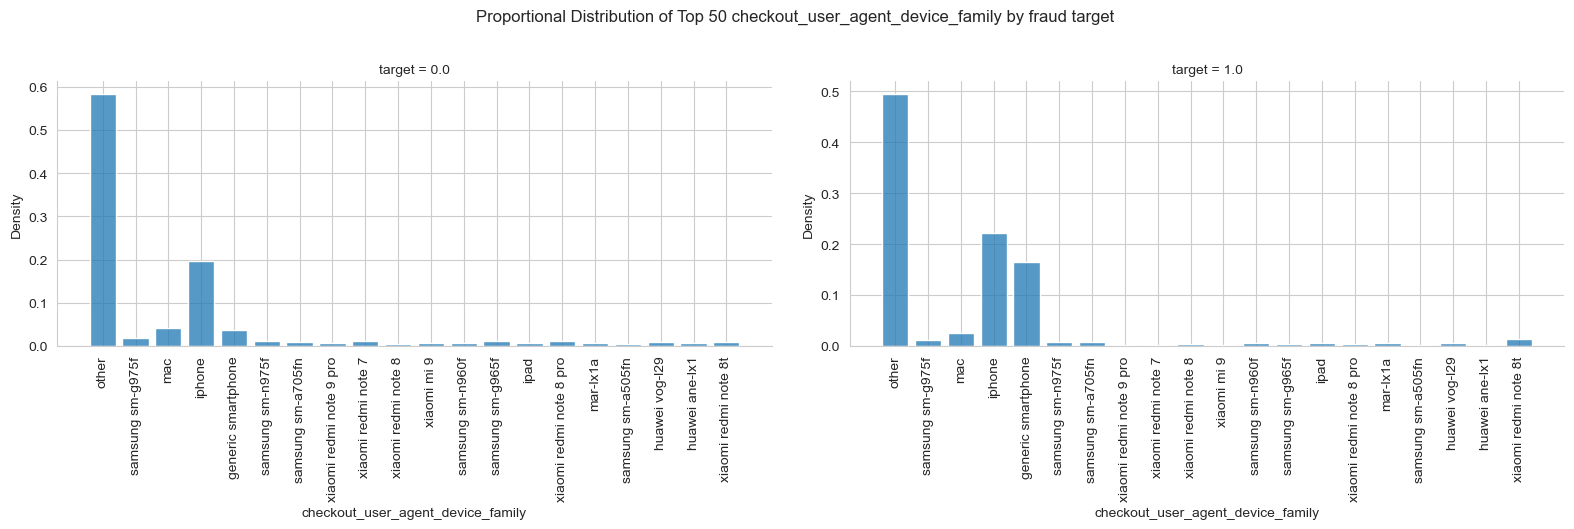

Number of categories for checkout_user_agent_device_brand is: 20


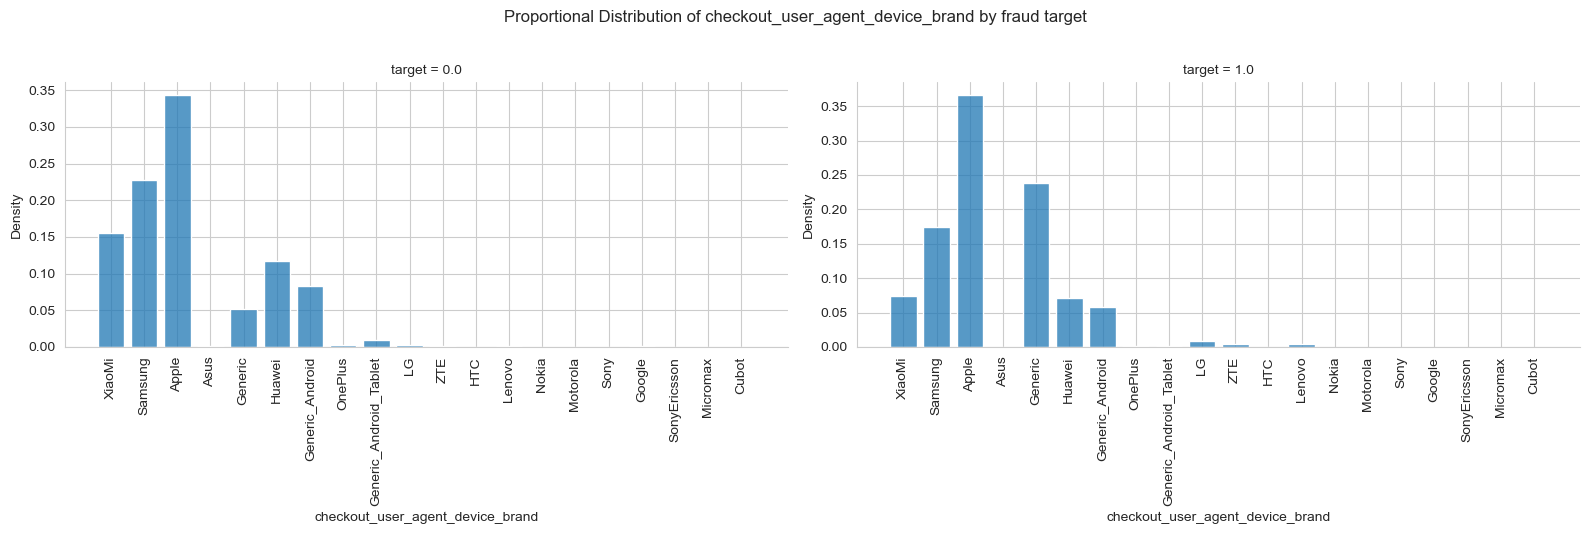

Number of categories for checkout_user_agent_device_model is: 664


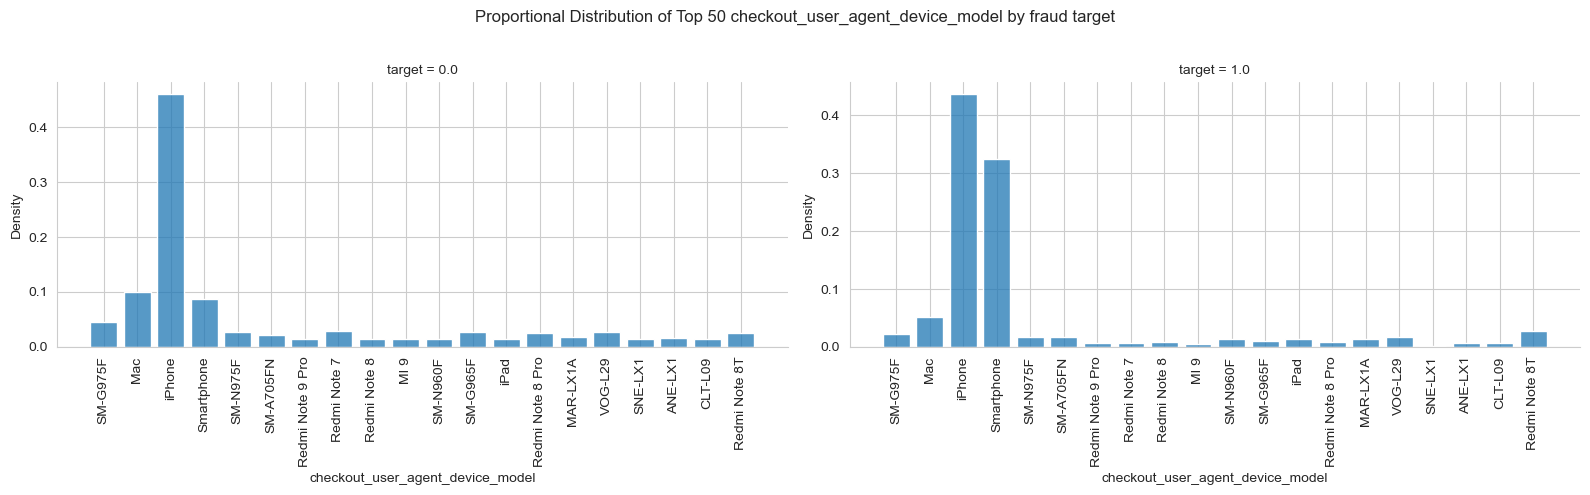

Number of categories for checkout_user_agent_os_family is: 14


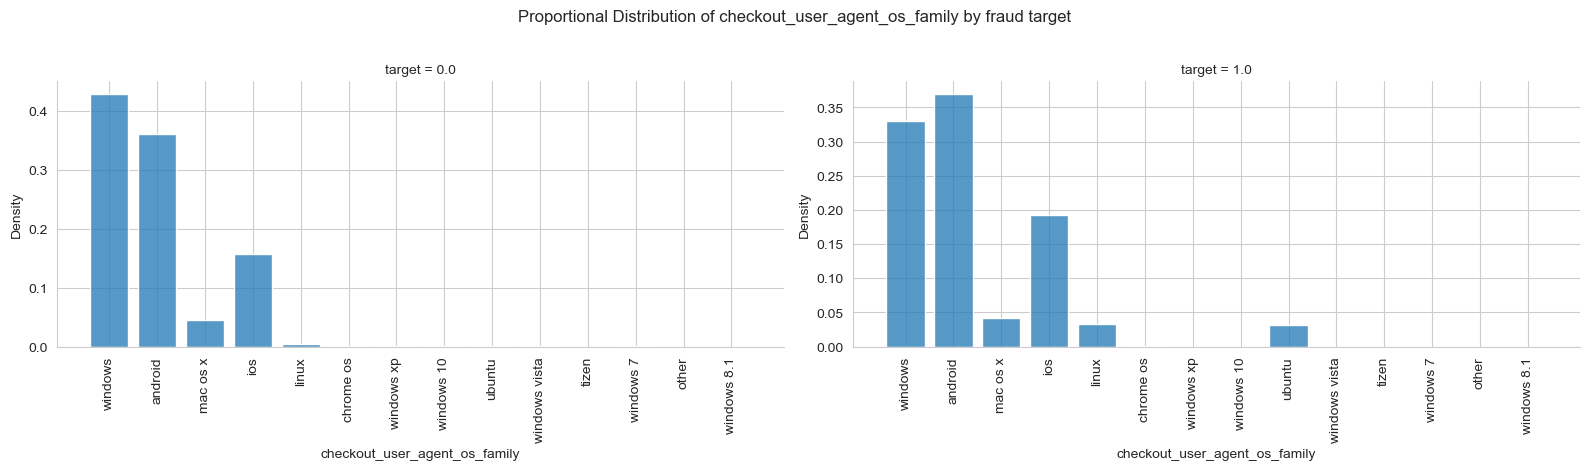

Number of categories for checkout_user_agent_os_version is: 137


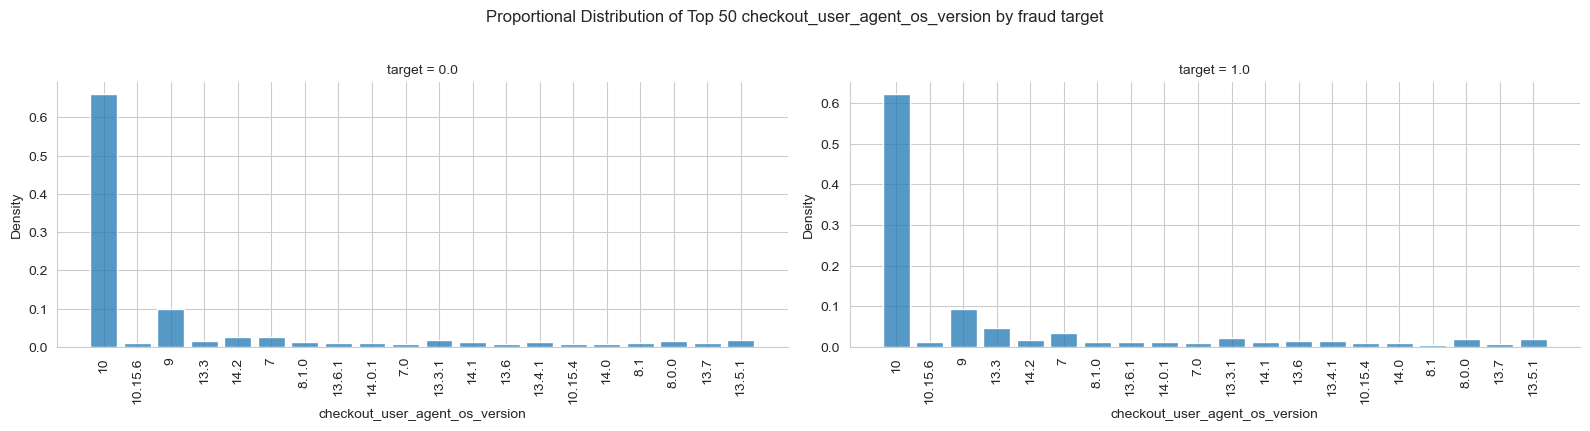

Number of categories for item_prices is: 15330


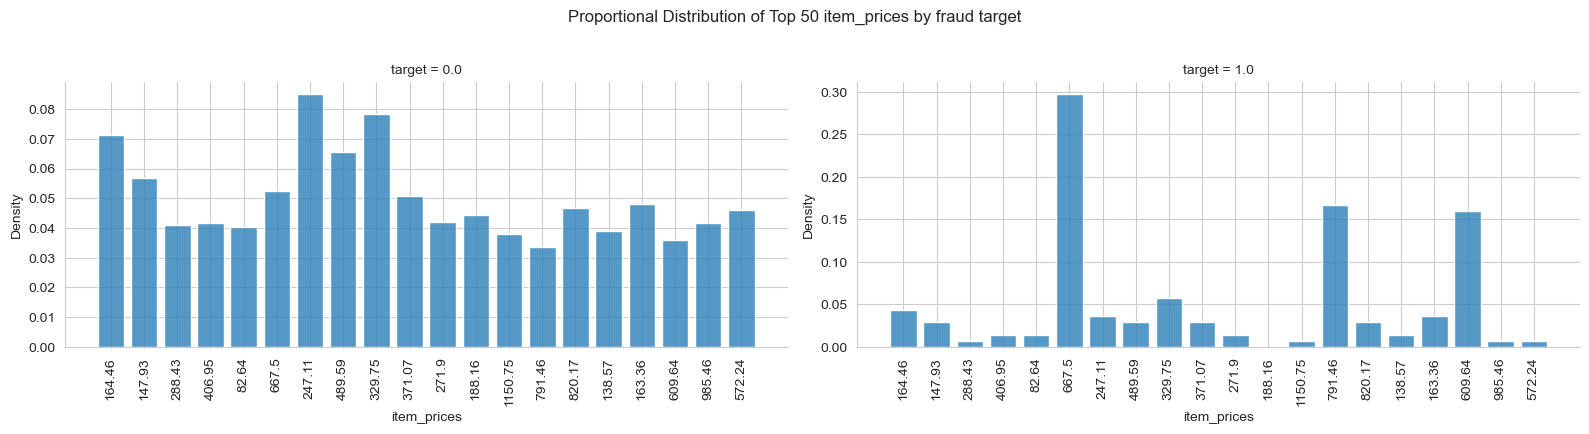

Number of categories for device_screen is: 622


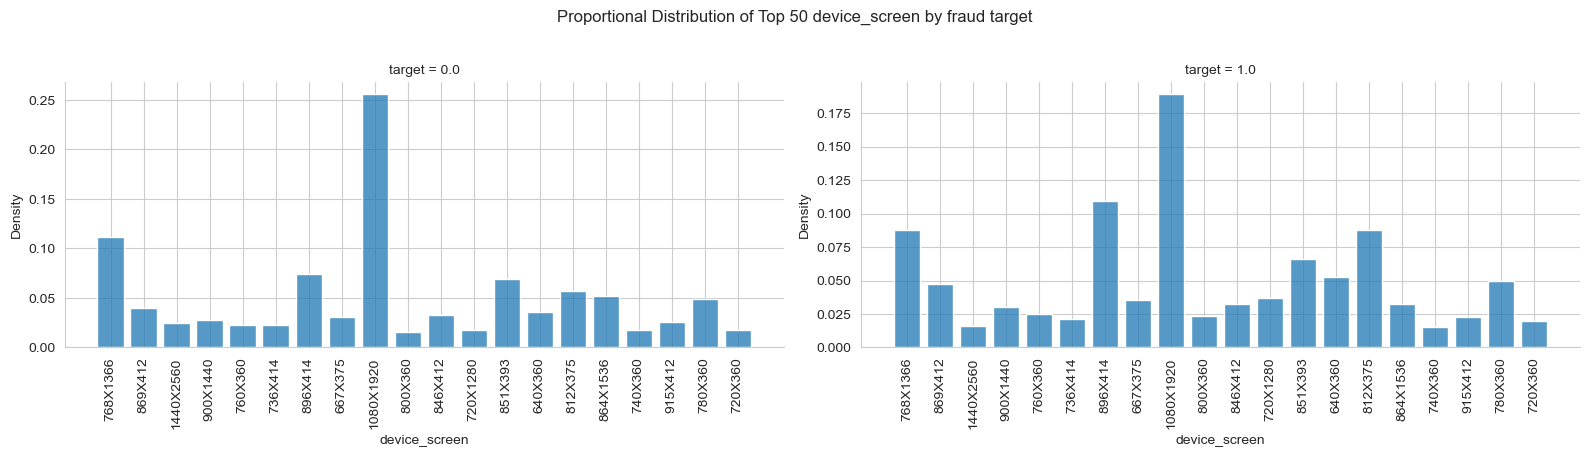

Number of categories for device_browser_version is: 402


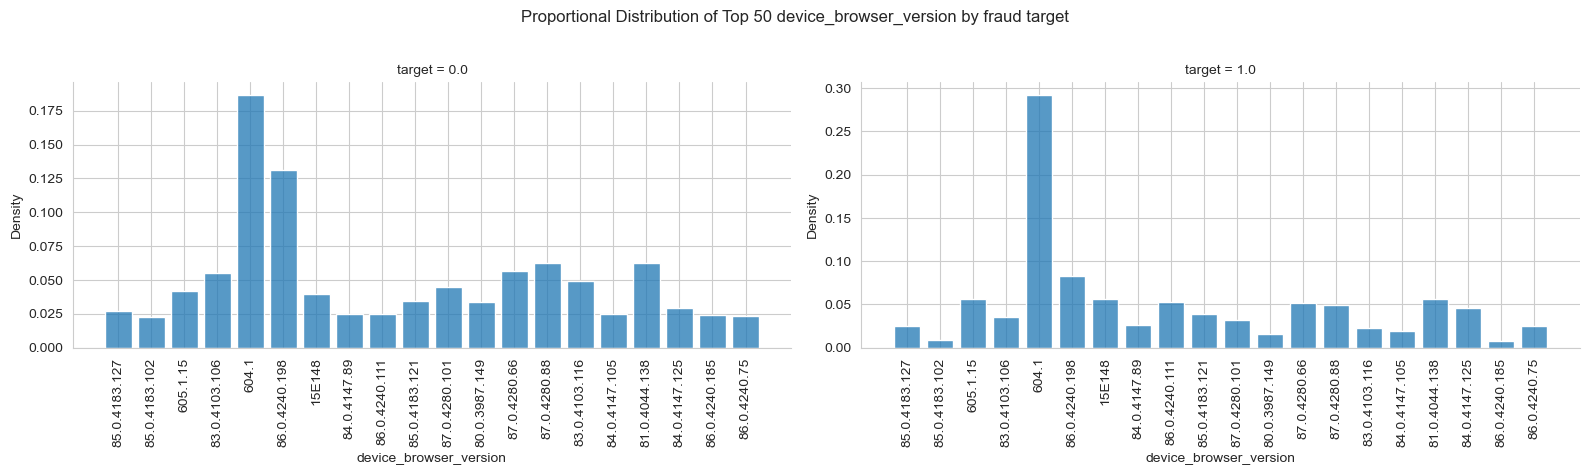

Number of categories for device_browser_language is: 1188


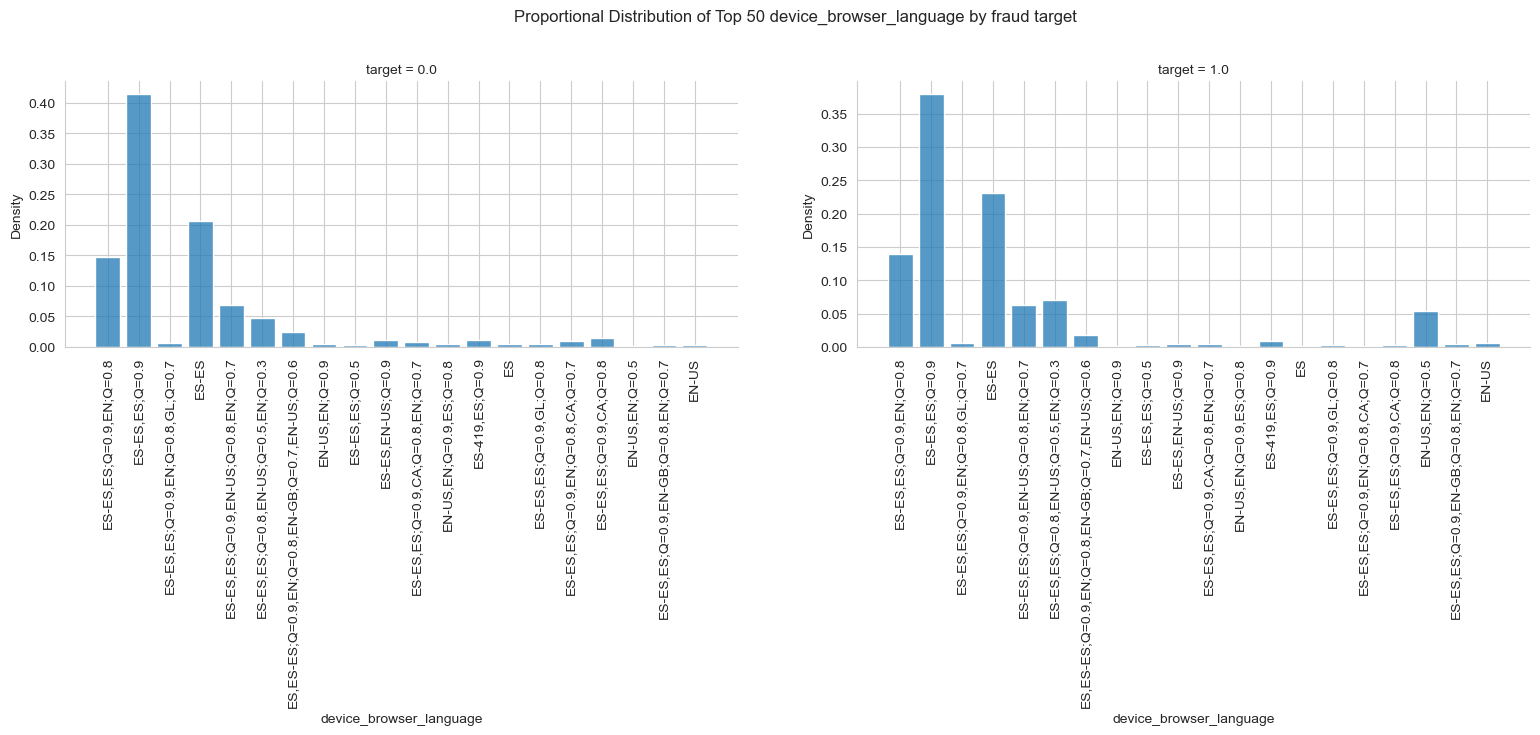

Number of categories for device_browser_type is: 20


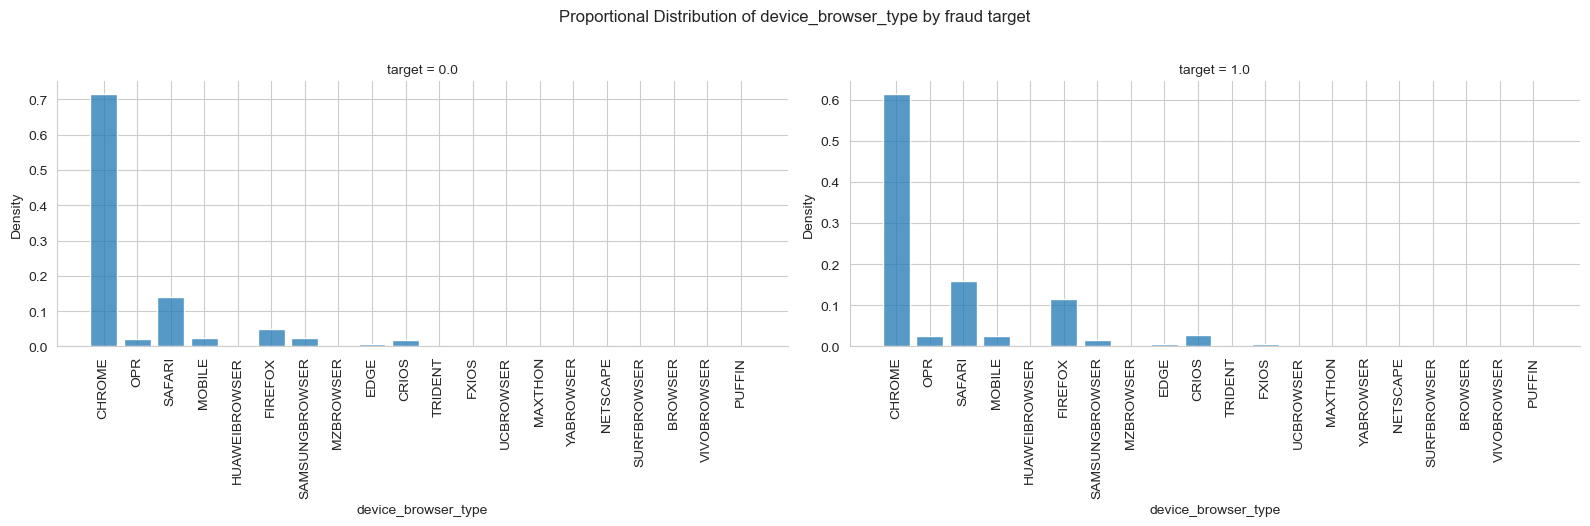

Number of categories for real_ip_parent_organization is: 1042


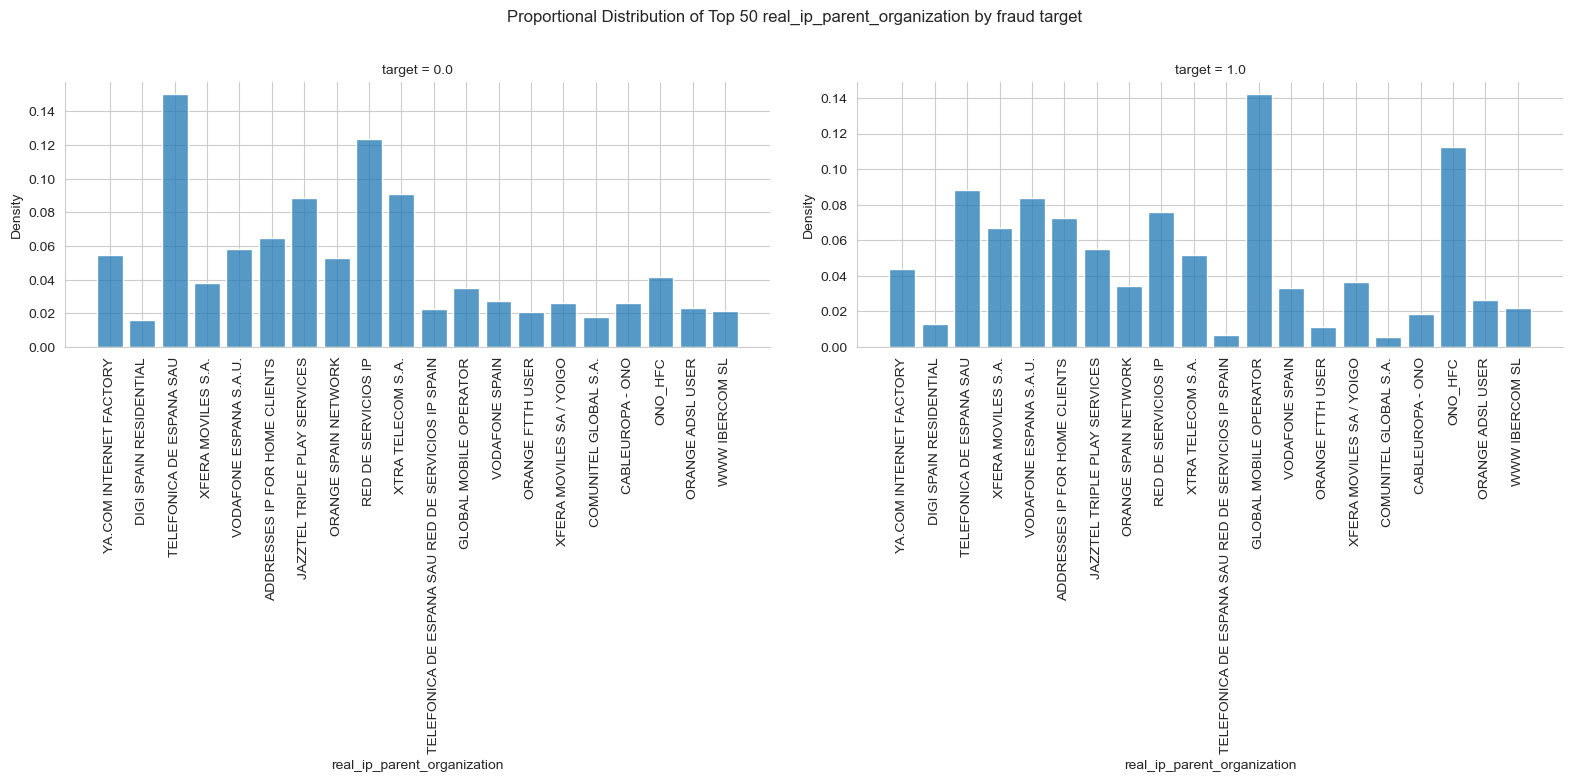

Number of categories for real_ip_city is: 3874


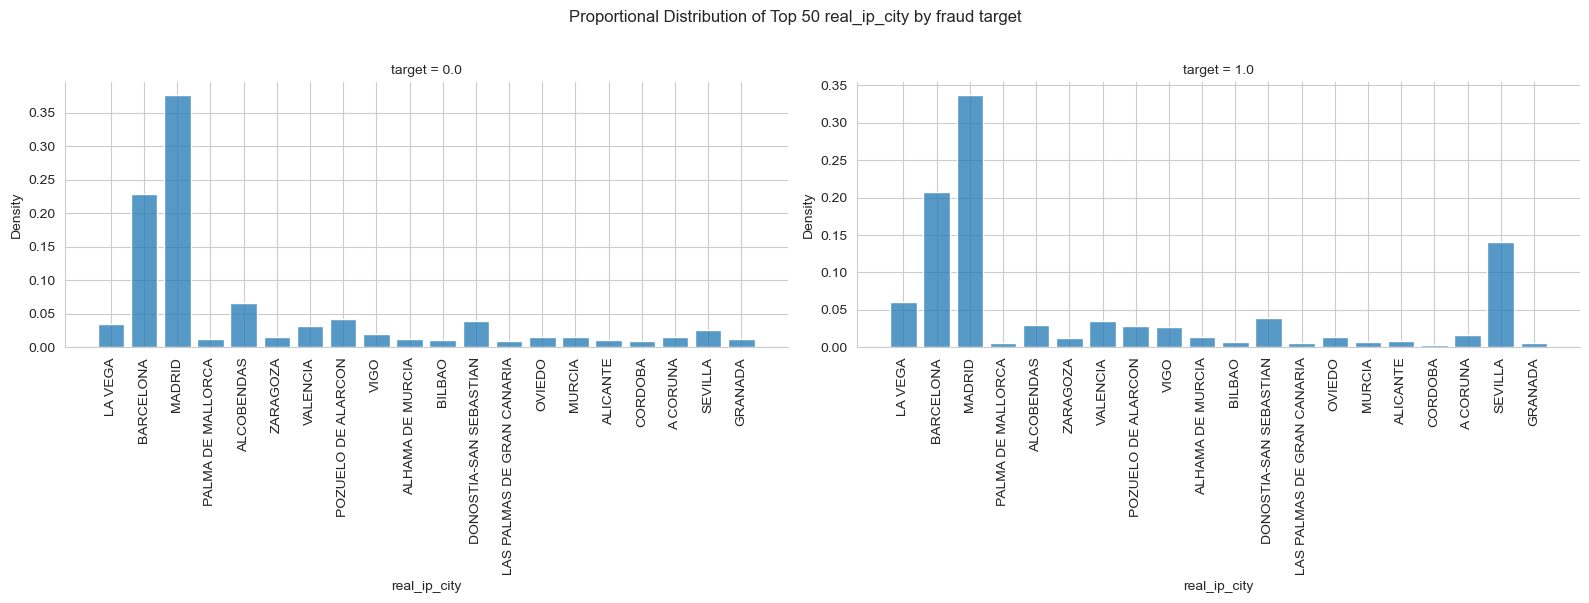

Number of categories for real_ip_region is: 113


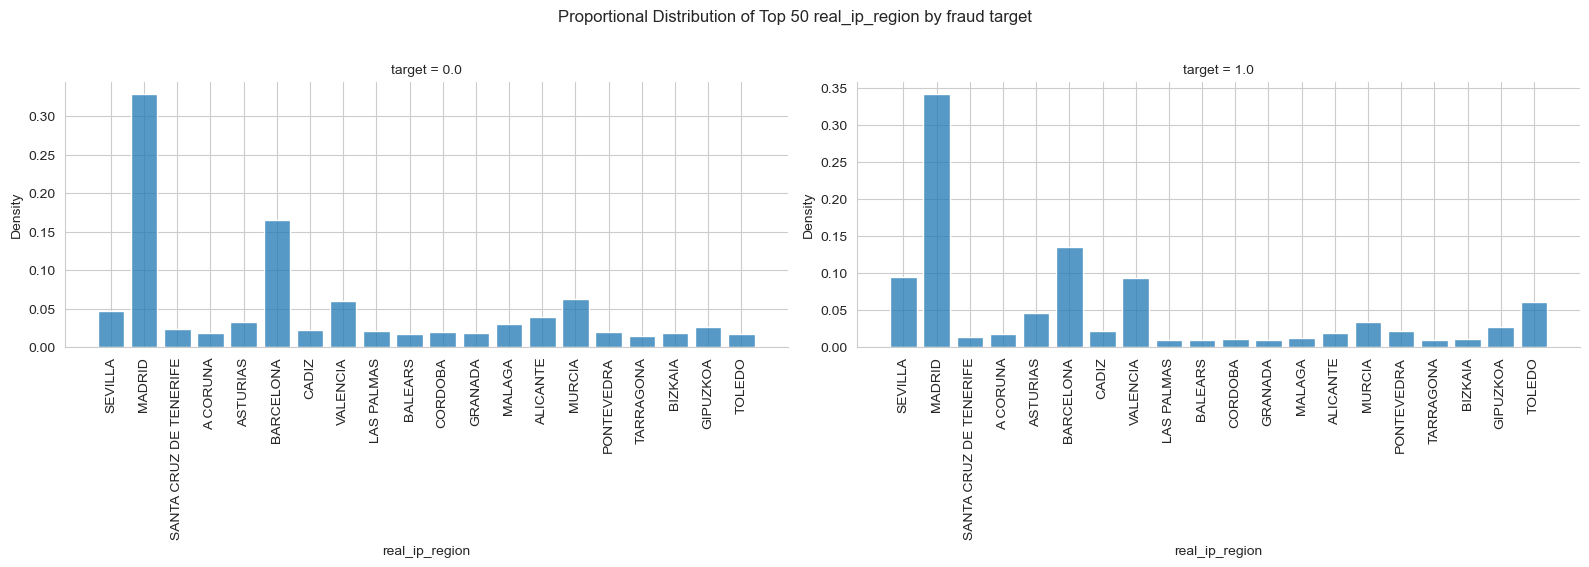

Number of categories for real_ip_isp is: 473


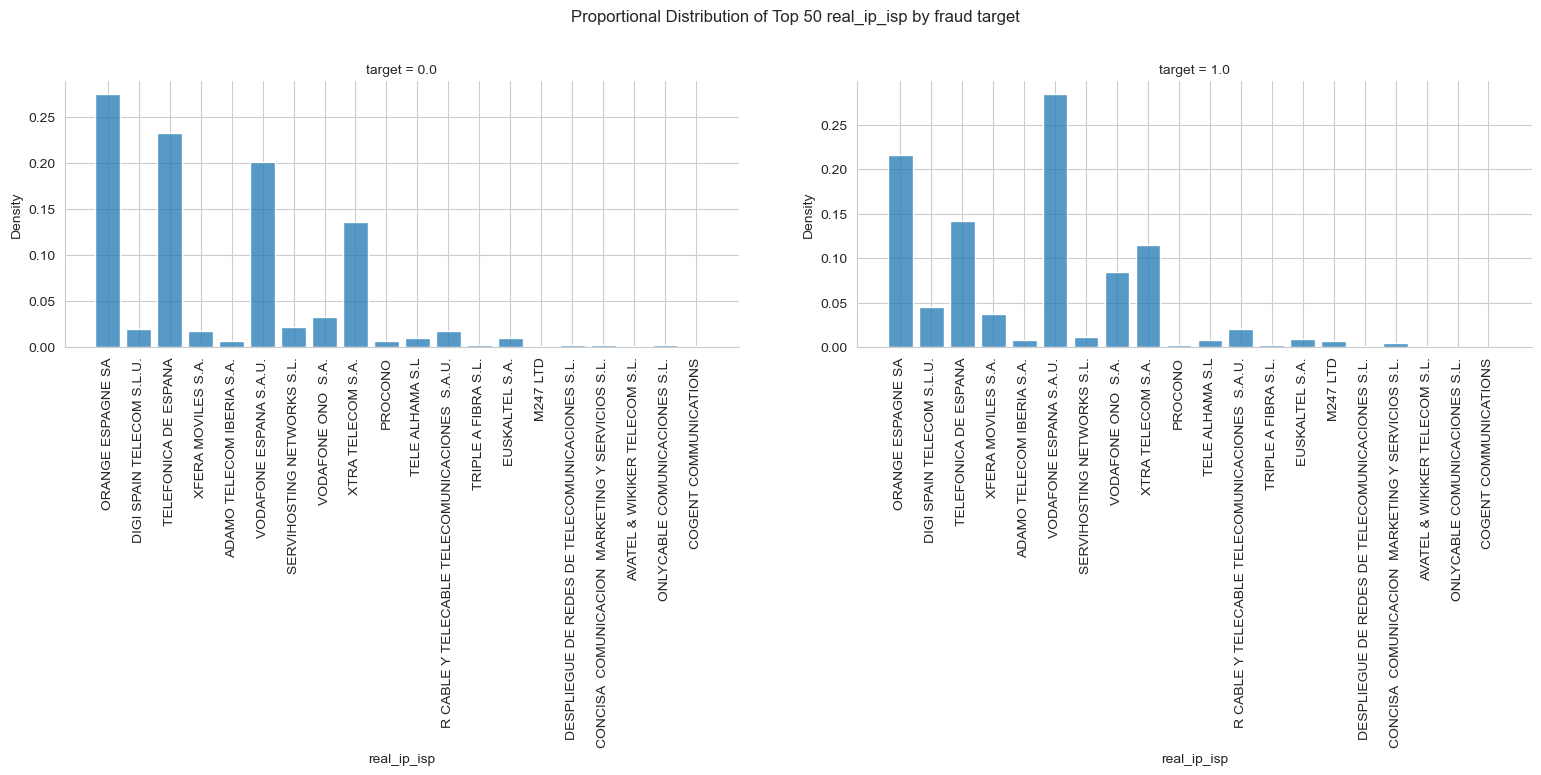

Number of categories for ip_userType is: 4


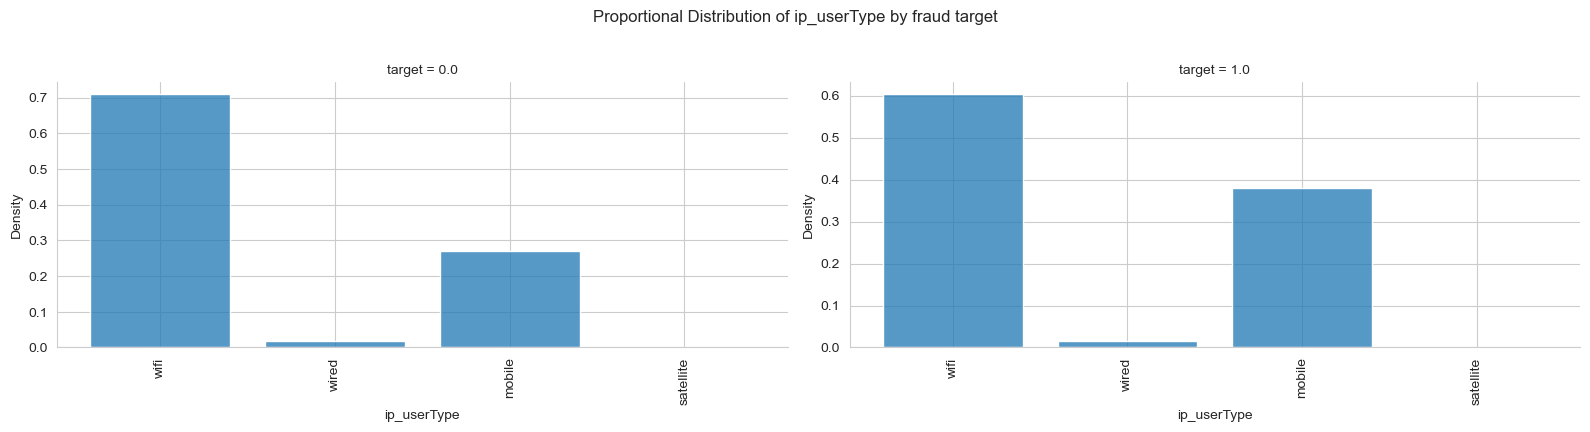

Number of categories for ip_address.traits.user_type is: 9


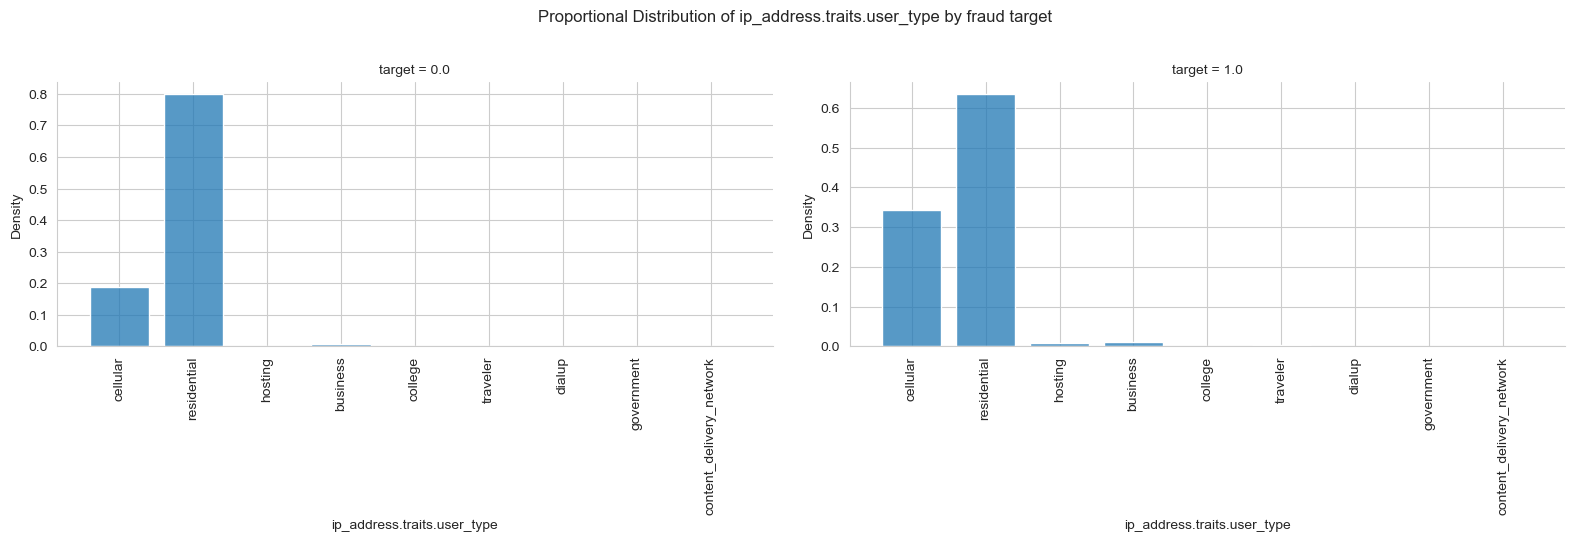

Number of categories for payment_method_card_type is: 3


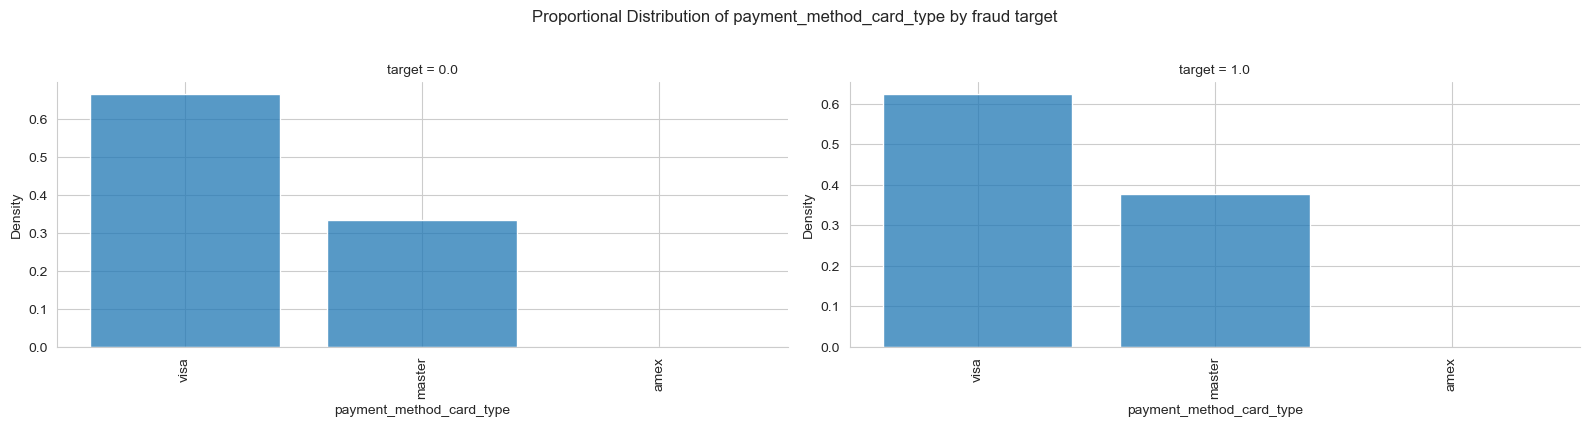

Number of categories for bank_countrycode is: 25


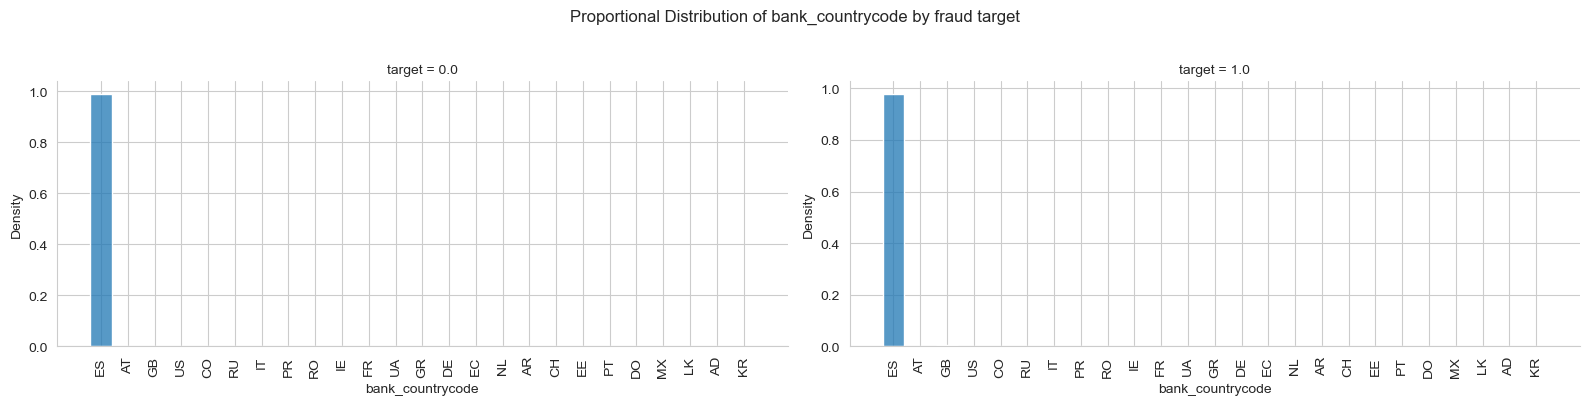

Number of categories for creditcard_level is: 20


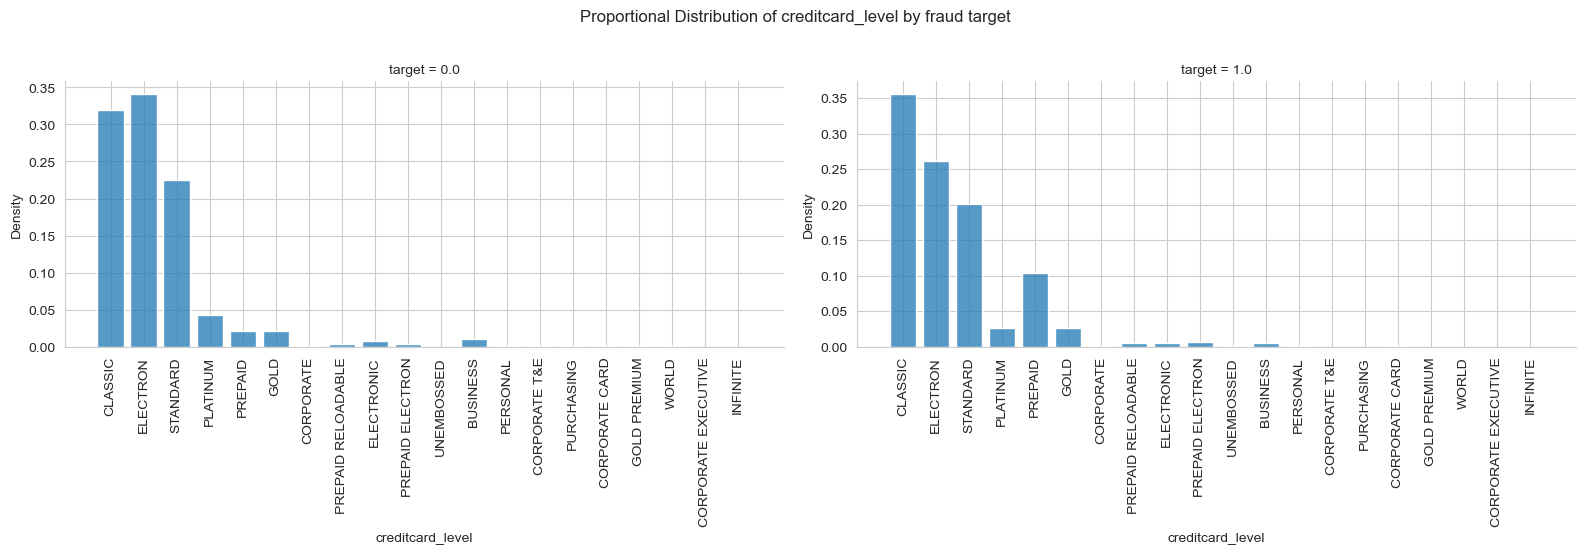

Number of categories for creditcard_type is: 2


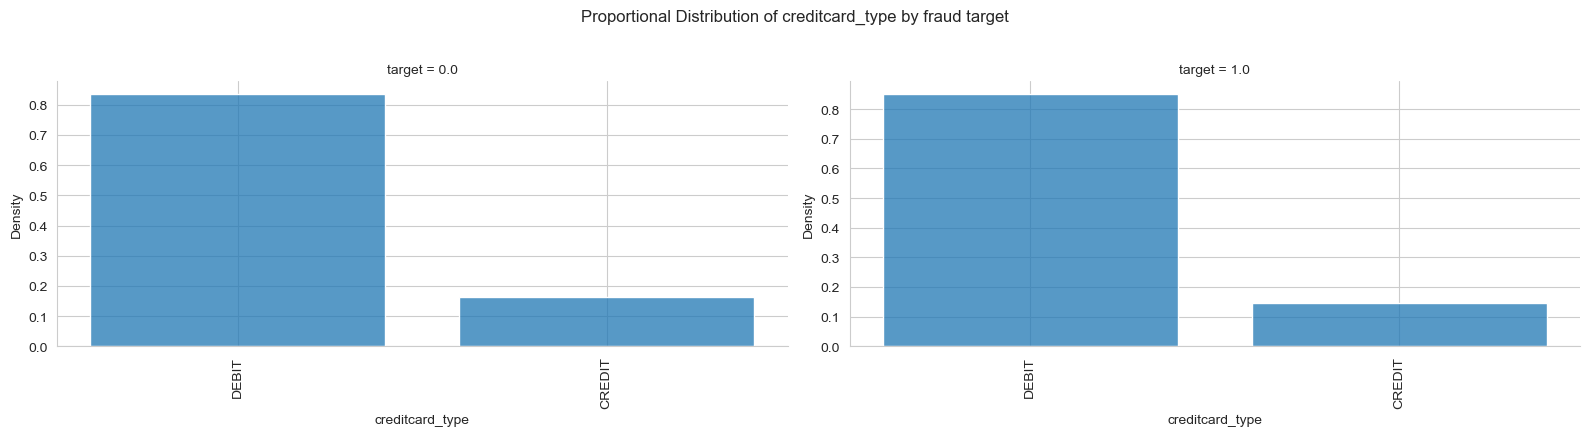

In [28]:
for var in cat_vars:
    # Normalize counts to show proportion
    print(f'Number of categories for {var} is: {df[var].nunique()}')
    if df[var].nunique() < 50:
        g = sns.FacetGrid(df, col='target', height=4, aspect=2, sharey=False)
        g.map(sns.histplot, var, stat="density", discrete=True, shrink=0.8)
        for ax in g.axes.flat:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        plt.subplots_adjust(top=0.8)
        g.fig.suptitle(f'Proportional Distribution of {var} by fraud target')
        plt.show()
    else:
        top_20_categories = df[var].value_counts().index[:20]
        df_top_20 = df[df[var].isin(top_20_categories)]
        
        g = sns.FacetGrid(df_top_20, col='target', height=4, aspect=2, sharey=False)
        g.map(sns.histplot, var, stat="density", discrete=True, shrink=0.8)
        for ax in g.axes.flat:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        plt.subplots_adjust(top=0.8)
        g.fig.suptitle(f'Proportional Distribution of Top 50 {var} by fraud target')
        plt.show()